# Data Analytics On the Web - Assignment 1

# Introduction
This document tries to solve problem related to predicting vehicle collisions in New York based on the weather on a particular day. To solve above problem, below public data is utilized which is readily available for making queries and export as part of Google BigQuery.

*   New York's Central park location's weather data from 2012 to 2021
*   New York's collisions data from 2012 to 2021

Google BigQuery is a serverless, highly scalable data warehouse that comes with a built-in query engine. The query engine is capable of running SQL queries on terabytes of data in a matter of seconds, and petabytes in only minutes (Lakshmanan, Tigani 2019).

**Note:** The reason why 2022 is not included is because its incomplete and data is impacted due to Covid-19 lockdowns.


# Methodology

**Prepare Weather Data**

First activity is to prepare collated data of collisions and weather so that analysis and analytics can be performed on it.

Weather data is found from "bigquery-public-data.noaa_gsod" directory under "bigquery-public-data" folder under Big Query UI.

Below sample query is run to get few records for gaining understanding on the structure and the schema.
```
SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2012` LIMIT 1000
```
This provides all necessary columns related to weather as shown below.

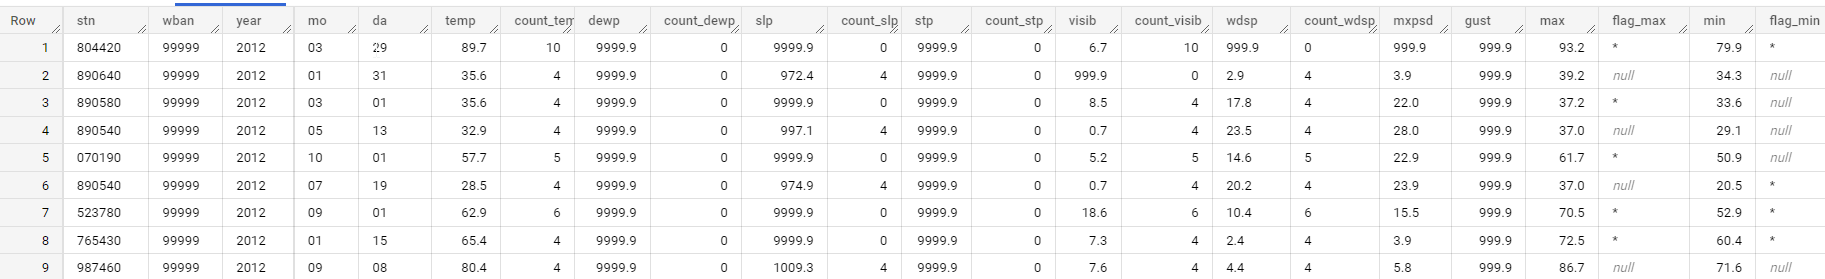

Below is the explanation about various weather data columns.

temp - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9

dewp - Mean dew point for the day in degreesm Fahrenheit to tenths. Missing = 9999.9

slp - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9

visib - Mean visibility for the day in miles to tenths. Missing = 999.9

wdsp - Mean wind speed for the day in knots to tenths. Missing = 999.9

mxpsd - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

gust - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9

max - Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9

min - Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9

prcp - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data

sndp - Snow depth in inches to tenths--last report for the day if reported more than once. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days

fog - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

----

This data is for all of the U.S.A. For this problem, only New York data needs to be considered.

This further filtering is done using "stn" column which contains station code for various locations.

"stn" code for New York's Central park are is found using below query.

```
SELECT * FROM `bigquery-public-data.noaa_gsod.stations` where country = 'US' and state = 'NY'
```

From the above result, station codes for various areas in New York can be seen. For purpose of this problem, "NEW YORK CENTRAL PARK" weather data is used i.e *stn ="725060"*.
The reasoning behind this is that Central park is at centre of the city and New York is relatively smaller city and weather is not going to differ much between various parts of the city.

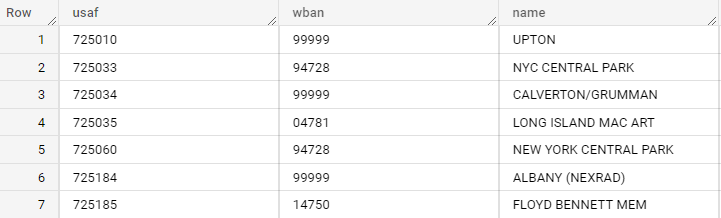



Below query is used to create a database view **"weather_2012_2021"** which fetches weather data for *New York Central Park* for the years between 2012 and 2021.

```
# Create a database view which contains data Newyork Central park data from 2012 to 2021.
CREATE VIEW `uhi-project-362215.assignment_1_updated.weather_2012_2021` AS
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE stn='725060' 
union all
#for 2014 there are more than 365 records under stn 725060, hence needed put further filter on wban column to get 365 rows i.e weather data for each day of the year
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE stn='725060'AND wban='14756'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE stn='725060'
union all 
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2021` WHERE stn='725060'
ORDER BY year, mo, da;

```

Columns which are not helpful are not included here such as flag max, flag min (covered by temp column) , flag_prcp (covered by prcp) etc.

Above database view has 3653 rows as shown below.

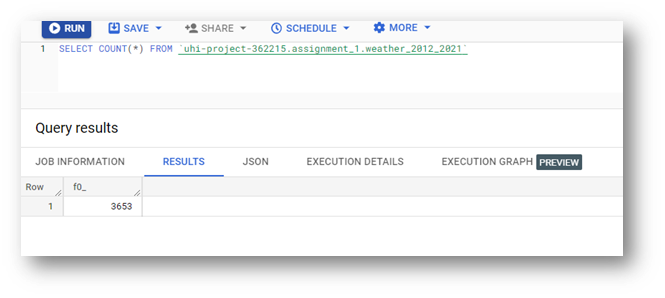

This is confirmed by below calculation.

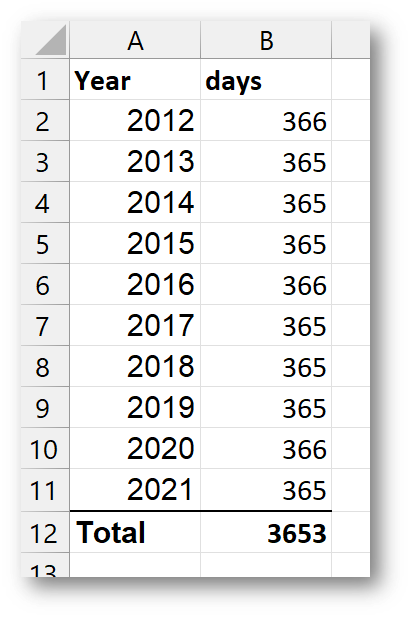

**Prepare Collisions Data**

Next step is to prepare the collisions data. Below SQL command is used to create a new database view **"collision_data_count_2012_2021"** which contains collisions data starting from 2012.

It uses **timestamp** column of original collisions data to find out collision date and number of collisions for a particular day and stores it in columns  "collision_date" and "NUM_COLLISIONS" respectively.

```
#Below SQL line creates a new database view which contians NYPD collision data 
#New column collision_date stores collision timestamp in DATE format instead of original DateTime
#New column NUM_COLLISIONS stores count of collision for a perticular date.

CREATE VIEW `uhi-project-362215.assignment_1_updated.collision_data_count`
AS SELECT CAST(timestamp as DATE) as collision_date, COUNT(CAST(timestamp as DATE)) as NUM_COLLISIONS
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
GROUP BY collision_date;

```

Above contains data up to 2022 but we are not considering 2022 collision data same as weather. Hence below command is run to filter them out.

```
#Below SQL line creates a new database view which contians NYPD collision data without 2022 data

CREATE VIEW `uhi-project-362215.assignment_1_updated.collision_data_count_2012_2021`
AS SELECT *
FROM `uhi-project-362215.assignment_1.collision_data_count`
WHERE collision_date < '2022-01-01'

```

This contains only 3471 rows which is less than weather data. This is because collision data is only present from 1st July 2012 and its missing data for first 182 days, hence rows are correct.

Next, a new column is added to above view which stores day of the week for the collision date as it might play an important role in predicting collisions along with weather.

```
#Create new DB view - Add day of the week to the collision data count

CREATE VIEW `uhi-project-362215.assignment_1_updated.collision_data_count_2012-2021_final`
AS SELECT FORMAT_DATE("%u", collision_date) as day, collision_date, NUM_COLLISIONS
FROM `uhi-project-362215.assignment_1_updated.collision_data_count_2012_2021`
```

At this point, we have collision and weather data from years 2012 to 2021 but in 2 separate views. Below command is run to collate them together and store it into a new table **"collated_collision_weather_data"**. Data is also ordered by date.

```
#Create new Table - Join collisions data with weather data

CREATE TABLE `uhi-project-362215.assignment_1_updated.collated_collision_weather_data`
AS SELECT day, year, mo, da, collision_date, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, thunder, NUM_COLLISIONS 
FROM `uhi-project-362215.assignment_1_updated.weather_2012_2021` as weather, `uhi-project-362215.assignment_1_updated.collision_data_count_2012-2021_final` as collisions
WHERE collisions.collision_date = weather.date
ORDER BY year, mo, da;
```

All the data from this new table is fetched using below command.

```
SELECT * FROM `uhi-project-362215.assignment_1_updated.collated_collision_weather_data`
```

Now this data is exported as CSV file and uploaded to a git repository so that it can be consumed from Google colaboratory.

**Overview of Google Colab and R**

Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs.

It allows to create notebooks where code can be written and executed and at the same time it allows developers to write explanation of the code, thus, preventing need of maintaining multiple documents.

Collab allows notebooks with various run-times such as python or R.

This current document is created using R run-time.

R is a programming language created by statisticians for statistics, specifically for working with data. It is a language for statistical computing and data visualizations used widely by business analysts, data analysts, data scientists, and scientists (Miller 2022).

This data is now analysed using R runtime in google collab which is covered in below Results section.

**Note:** By default, Google collab opens a new file in python kernel but for this purpose we need to use below link to tell google collab that we want to use "R" kernel instead.

https://colab.research.google.com/notebook#create=true&language=r





# Results

As part of this section, collated CSV data which contains collisions with weather is analysed using R runtime in google colab.


First thing is to fetch collated weather and collisions data from 2012 to 2021 and store into a variable named **nycollisions**

In [1]:
nycollisions <- read.csv("https://raw.githubusercontent.com/22017498uhi/22017498_DataAnalytics/main/Assignment_1_initial_collated_collisions_weather_data.csv", stringsAsFactors = TRUE)

Using **head** command, it is verified that data can be opened here.

In [2]:
head(nycollisions)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,⋯,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,thunder,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,⋯,18.1,93.0,66.0,0.00,999.9,0,0,0,0,538
2,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,⋯,999.9,88.0,66.9,0.00,999.9,0,0,0,0,564
3,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,⋯,999.9,88.0,63.0,0.00,999.9,0,0,0,0,664
4,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,⋯,999.9,91.0,68.0,0.06,999.9,0,1,0,0,432
5,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,⋯,999.9,93.9,70.0,99.99,999.9,0,1,0,0,591
6,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,⋯,999.9,91.0,66.9,0.00,999.9,0,0,0,0,638


Using below **tail** command we can confirm that all 3471 rows are added to this runtime.

In [3]:
tail(nycollisions)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,⋯,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,thunder,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3466,7,2021,12,26,2021-12-26,42.8,36.7,1004.7,8.3,13.7,⋯,32.1,50.0,35.1,0.25,999.9,1,1,0,0,186
3467,1,2021,12,27,2021-12-27,38.0,28.4,1015.3,10.0,12.4,⋯,26.0,44.1,36.0,0.03,999.9,0,0,0,0,207
3468,2,2021,12,28,2021-12-28,43.1,38.3,1011.0,9.1,7.5,⋯,999.9,48.9,35.1,0.05,999.9,1,0,0,0,221
3469,3,2021,12,29,2021-12-29,43.9,36.4,1012.1,10.0,4.1,⋯,999.9,48.9,39.9,0.01,999.9,1,0,0,0,192
3470,4,2021,12,30,2021-12-30,47.4,42.1,1014.2,9.9,5.4,⋯,999.9,51.1,41.0,0.00,999.9,0,0,0,0,223
3471,5,2021,12,31,2021-12-31,48.3,44.9,1014.2,8.5,3.4,⋯,999.9,51.1,45.0,0.00,999.9,1,0,0,0,232


Below **summary** command is used to get overall summary of various fields in our data.

In [4]:
summary(nycollisions)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2017   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2017   Mean   : 6.681   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2019   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2021   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp               slp       
 2012-07-01:   1   Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 2012-07-02:   1   1st Qu.:41.30   1st Qu.:   32.70   1st Qu.: 1012  
 2012-07-03:   1   Median :52.60   Median :   45.70   Median : 1017  
 2012-07-04:   1   Mean   :52.46   Mean   :   47.74   Mean   : 1022  
 2012-07-05:   1   3rd Qu.:64.90   3rd Qu.:   59.30   3rd Qu.: 1022  
 2012-07-06:   1   Max.   :86.70   Max.   : 9999.90   Max.  

**Day of the Week Analysis**

Now let's check collisions for day of the week and see if there is any correlation.

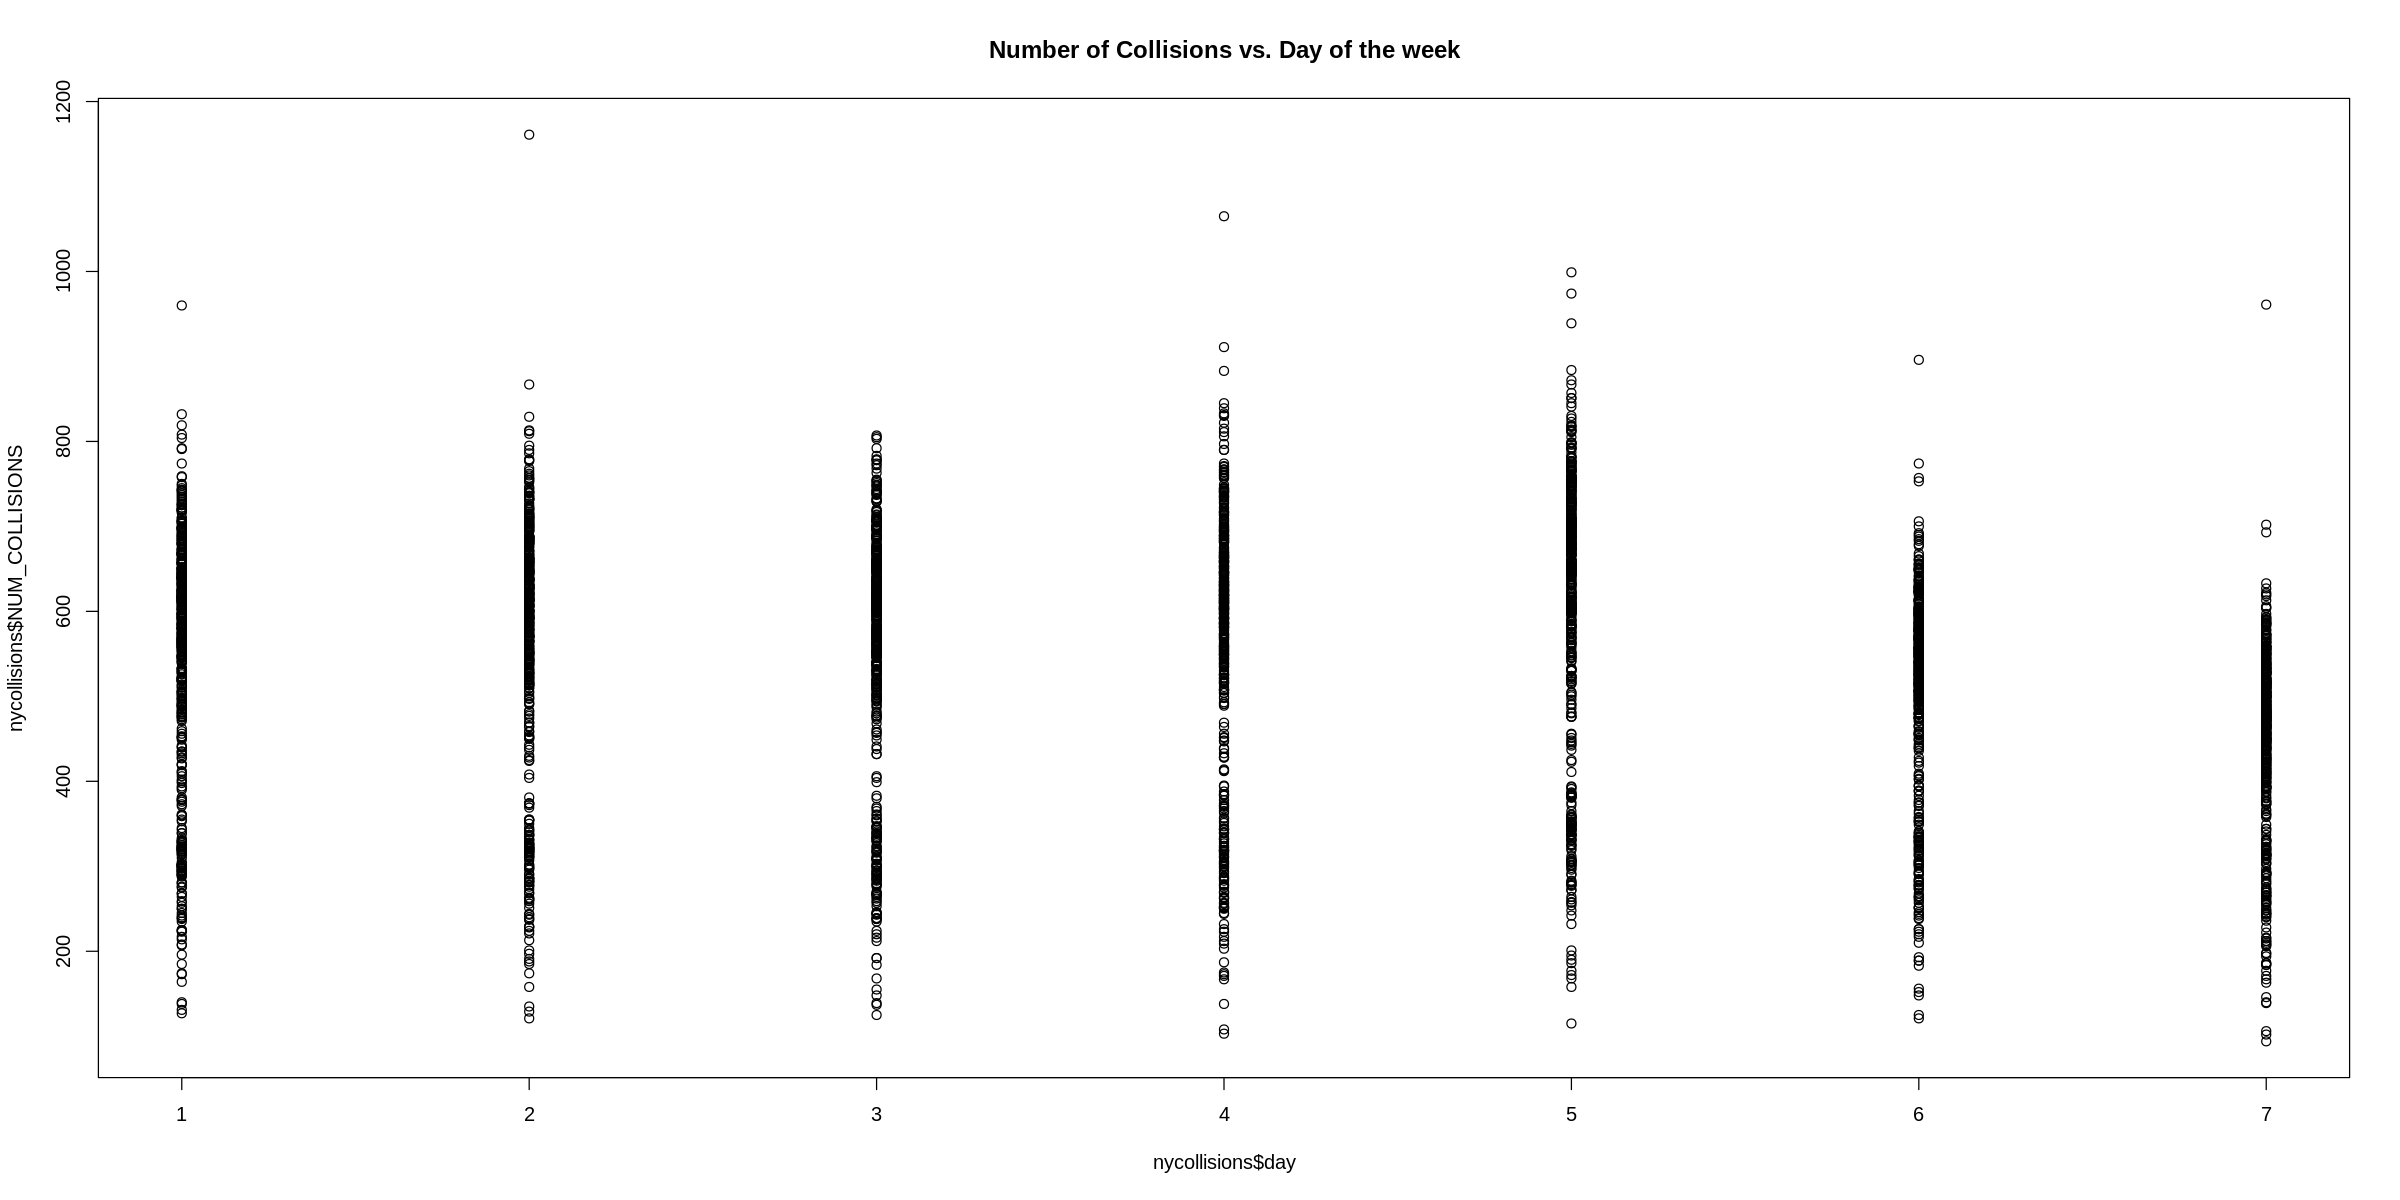

In [5]:
#increase graph width
options(repr.plot.width=20, repr.plot.height=10)

#draw the graph
plot(nycollisions$day, nycollisions$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week")


We can see collisions are lowest on Saturday and Sunday, most likely because people would be having a day off from work leading to less vehicles on the road, resulting in less collisions.

This behaviour is problematic for a linear regression. Hence to improve linear relationship, Sunday should be moved as 1st day, Saturday as 2nd and Monday to Friday as 3 to 7.

This is done using below commands.

In [6]:
#Store file data into new varaible nyCollMtoFdayUpdate

nyCollisionsDayUpdated <- nycollisions

#update monday(1) as 3, tues(2) as 4 and so on...basically adding by 2

nyCollisionsDayUpdated$day <- nyCollisionsDayUpdated$day+2

We can see below that day value is updated by 2.

In [7]:
head(nyCollisionsDayUpdated)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,⋯,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,thunder,NUM_COLLISIONS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,9,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,⋯,18.1,93.0,66.0,0.00,999.9,0,0,0,0,538
2,3,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,⋯,999.9,88.0,66.9,0.00,999.9,0,0,0,0,564
3,4,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,⋯,999.9,88.0,63.0,0.00,999.9,0,0,0,0,664
4,5,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,⋯,999.9,91.0,68.0,0.06,999.9,0,1,0,0,432
5,6,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,⋯,999.9,93.9,70.0,99.99,999.9,0,1,0,0,591
6,7,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,⋯,999.9,91.0,66.9,0.00,999.9,0,0,0,0,638


Now Sunday, which is currently as 9, is updated as 1 (first day of week) and Saturday as 2(second day of week) using below command.

In [8]:
#update sunday as day 1
nyCollisionsDayUpdated$day[nyCollisionsDayUpdated$day == 9] <- 1

#update saturday as day 2
nyCollisionsDayUpdated$day[nyCollisionsDayUpdated$day == 8] <- 2

Now data is printed using below command to make sure days are updated and are within 1 to 7 values.

In [9]:
head(nyCollisionsDayUpdated)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,⋯,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,thunder,NUM_COLLISIONS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,⋯,18.1,93.0,66.0,0.00,999.9,0,0,0,0,538
2,3,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,⋯,999.9,88.0,66.9,0.00,999.9,0,0,0,0,564
3,4,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,⋯,999.9,88.0,63.0,0.00,999.9,0,0,0,0,664
4,5,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,⋯,999.9,91.0,68.0,0.06,999.9,0,1,0,0,432
5,6,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,⋯,999.9,93.9,70.0,99.99,999.9,0,1,0,0,591
6,7,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,⋯,999.9,91.0,66.9,0.00,999.9,0,0,0,0,638


Now collisions are plotted for each day of the week again. We can see below that data is almost linear now. Only thing is that there are some outliners which would need to be removed to improve the data further.

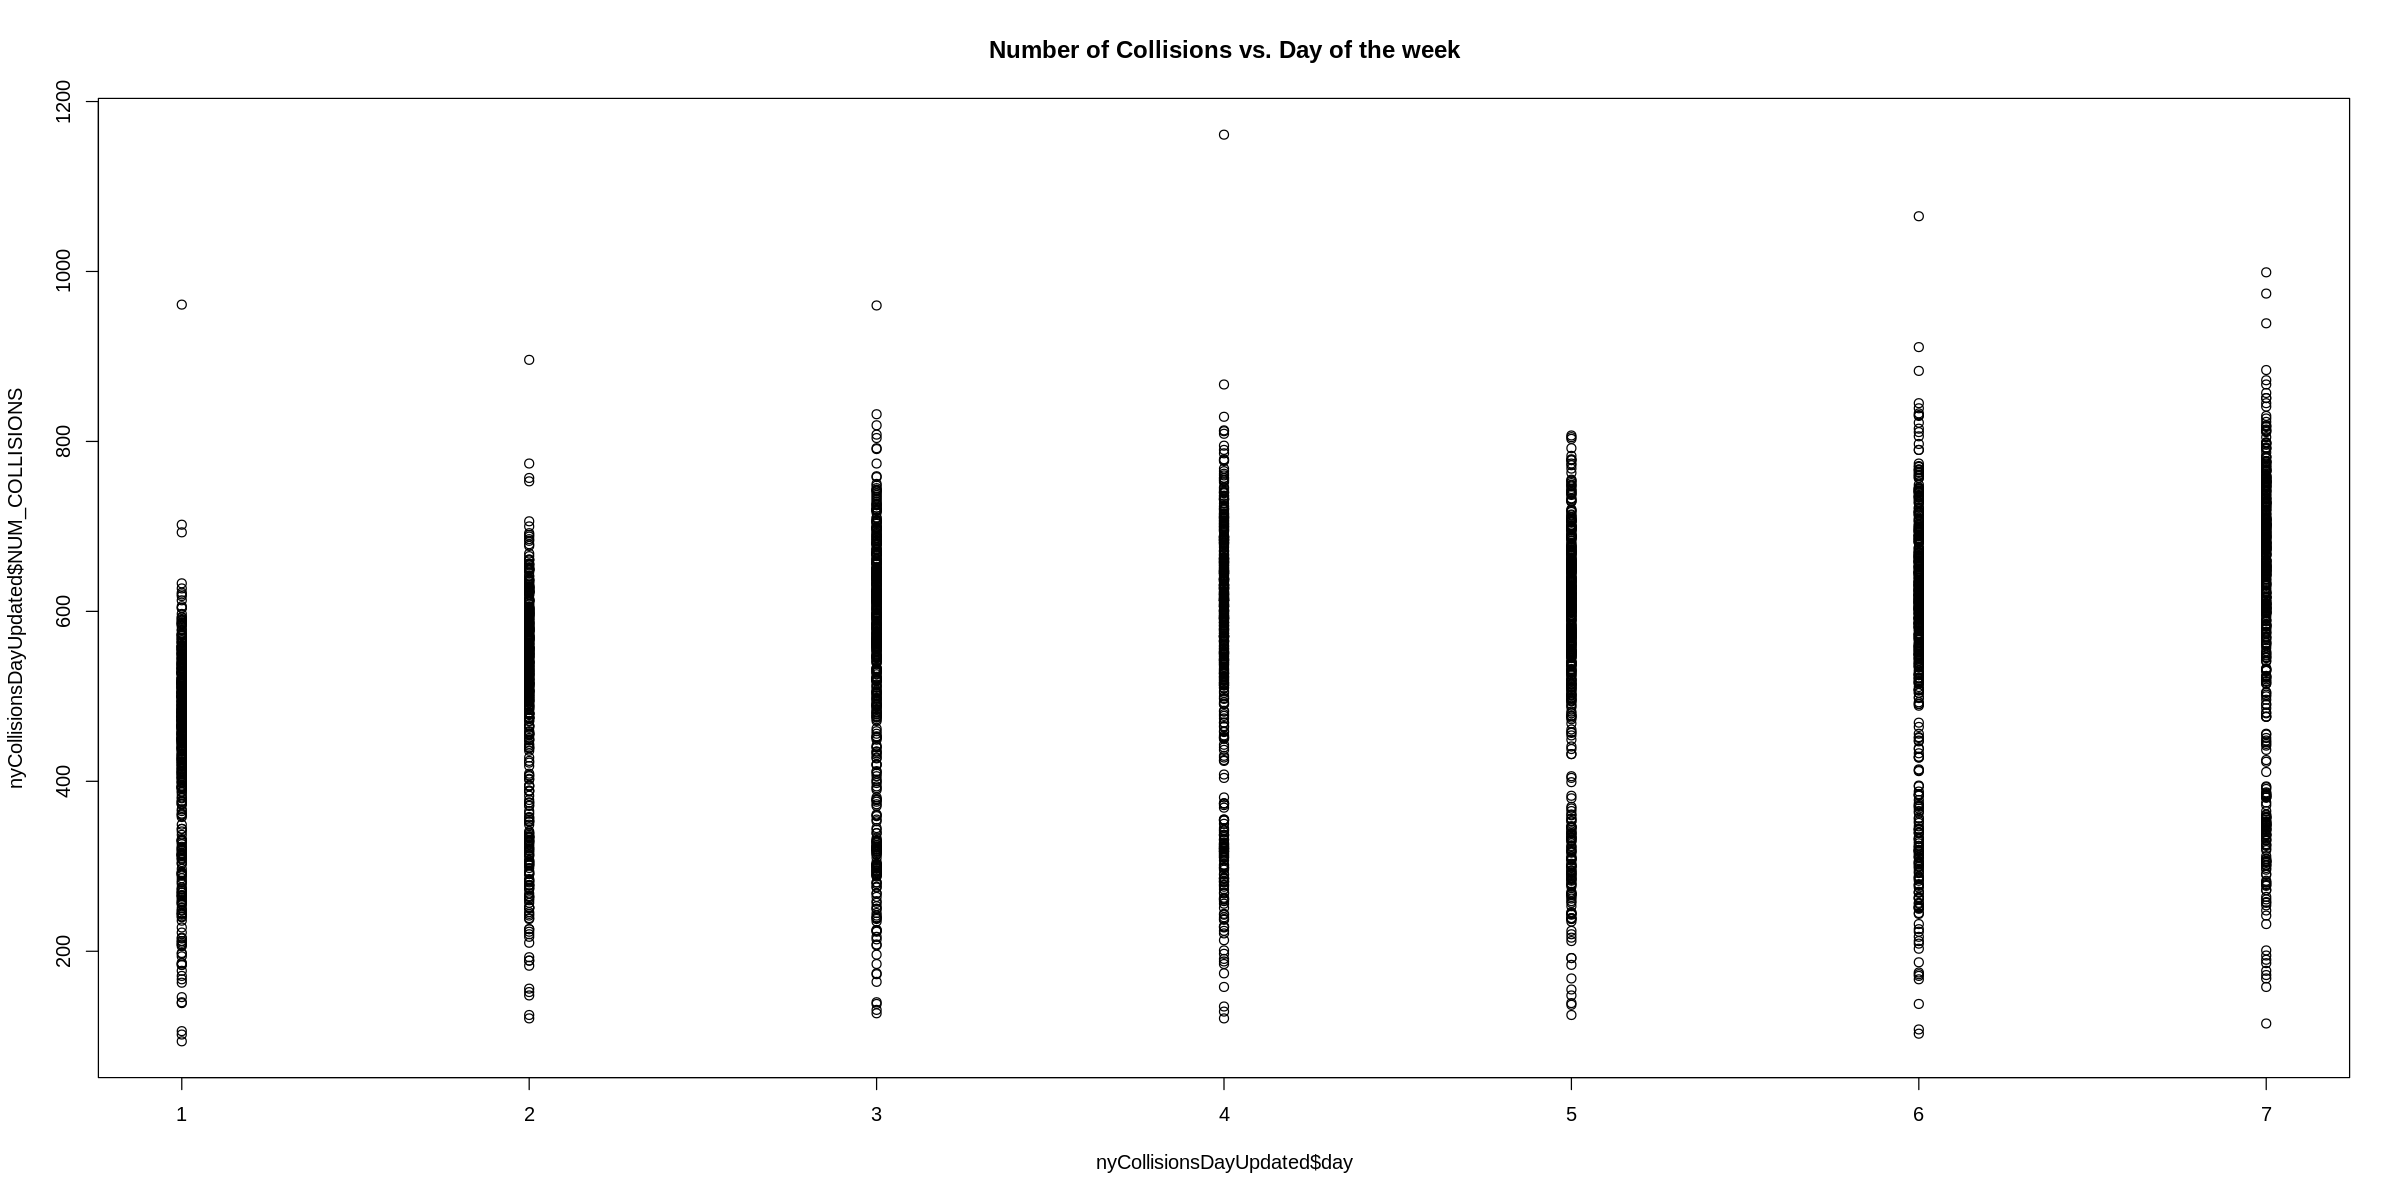

In [10]:
plot(nyCollisionsDayUpdated$day, nyCollisionsDayUpdated$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week")

If we check the correlation, it is now improved than before.

In [11]:
cor(nyCollisionsDayUpdated$day, nyCollisionsDayUpdated$NUM_COLLISIONS)


[1] 0.2780705

________________________________________________________________________________
**Collisions over the years Analysis**

Now let's check collisions over the years.


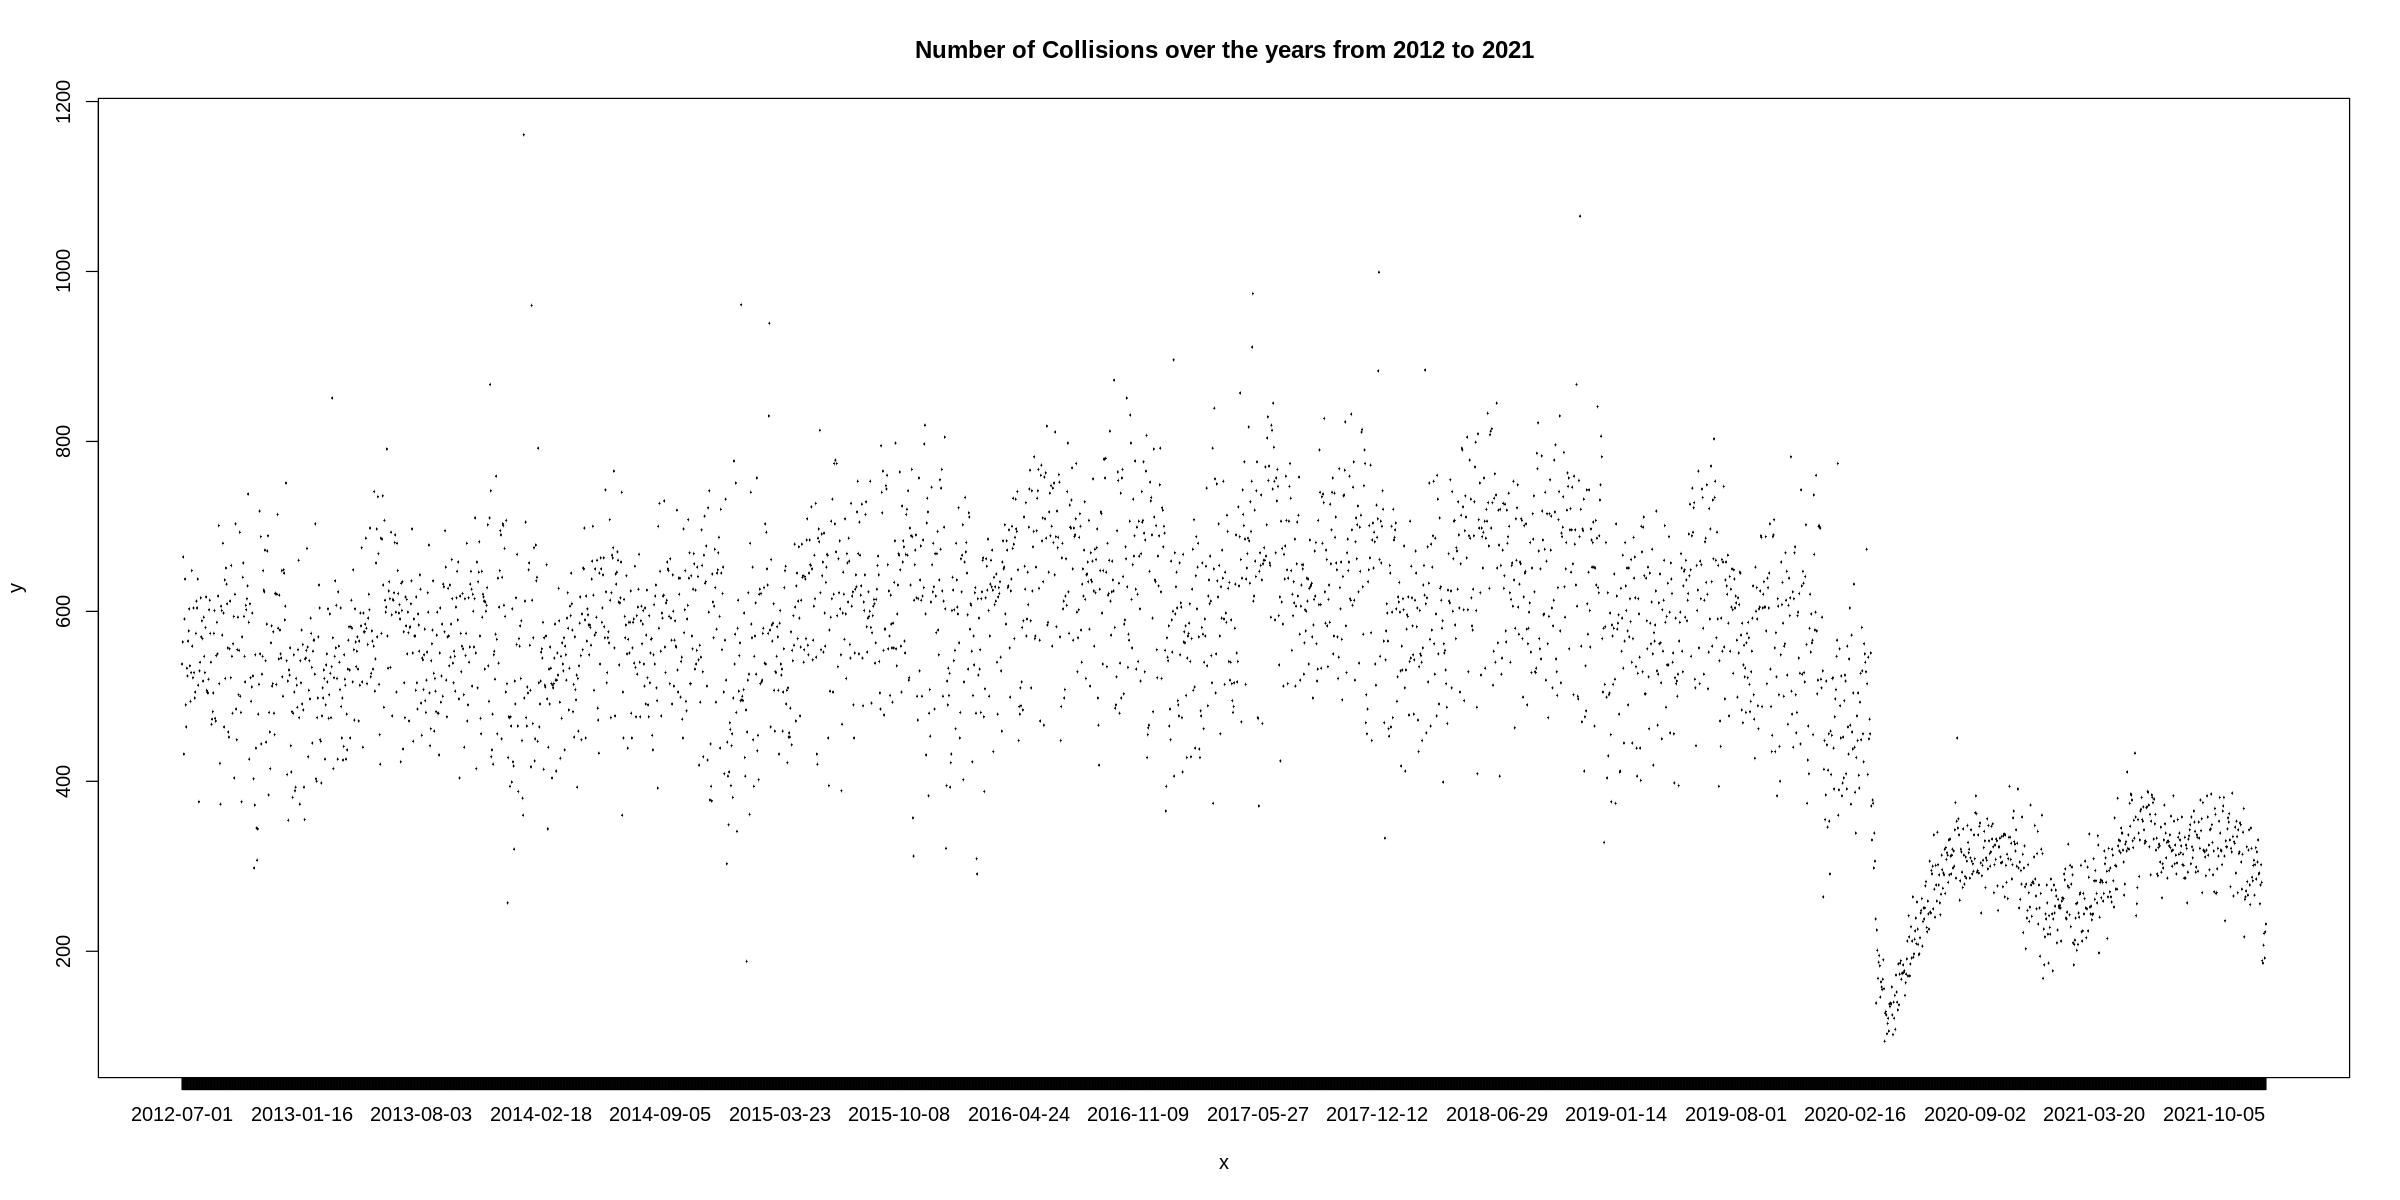

In [12]:
#plot the graph
plot(nyCollisionsDayUpdated$collision_date, nyCollisionsDayUpdated$NUM_COLLISIONS, main="Number of Collisions over the years from 2012 to 2021")

We can see that collisions have been increasing over the years from 2012 to 2019 (2019 is exception where it decreased), but due to COVID-19, collisions drastically got reduced from 2020 due to strict lockdown rules.

This is problematic for building the prediction models. Hence, we should remove data from 2020 to 2021 by running below command. It might get used for DNN regression model where this might not be a big problem.

In [13]:
nycollupto2019 <- nyCollisionsDayUpdated[which(nyCollisionsDayUpdated$year < 2020), ]

This truncation of data is verified using below command. We can see below that end of document contains data up to 2019 only.

In [14]:
tail(nycollupto2019)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,⋯,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,thunder,NUM_COLLISIONS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
2735,6,2019,12,26,2019-12-26,35.9,30.3,1025.7,10.0,5.9,⋯,999.9,46.4,28.9,0.00,999.9,0,0,0,0,414
2736,7,2019,12,27,2019-12-27,40.1,35.0,1026.1,10.0,7.6,⋯,999.9,48.0,28.9,0.00,999.9,0,1,0,0,448
2737,2,2019,12,28,2019-12-28,44.5,39.1,1019.1,9.0,9.1,⋯,999.9,48.2,37.0,0.00,999.9,0,0,0,0,355
2738,1,2019,12,29,2019-12-29,38.4,30.4,1021.7,10.0,6.8,⋯,999.9,48.0,30.9,0.00,999.9,0,0,0,0,384
2739,3,2019,12,30,2019-12-30,39.6,36.3,1017.1,5.2,13.0,⋯,35.0,45.0,30.9,0.39,999.9,0,1,0,0,518
2740,4,2019,12,31,2019-12-31,44.7,42.6,1002.6,4.8,14.7,⋯,39.0,52.0,37.9,0.88,999.9,1,1,0,0,443


Now graph of collisions over the years is drawn again to see if sudden drop is removed.

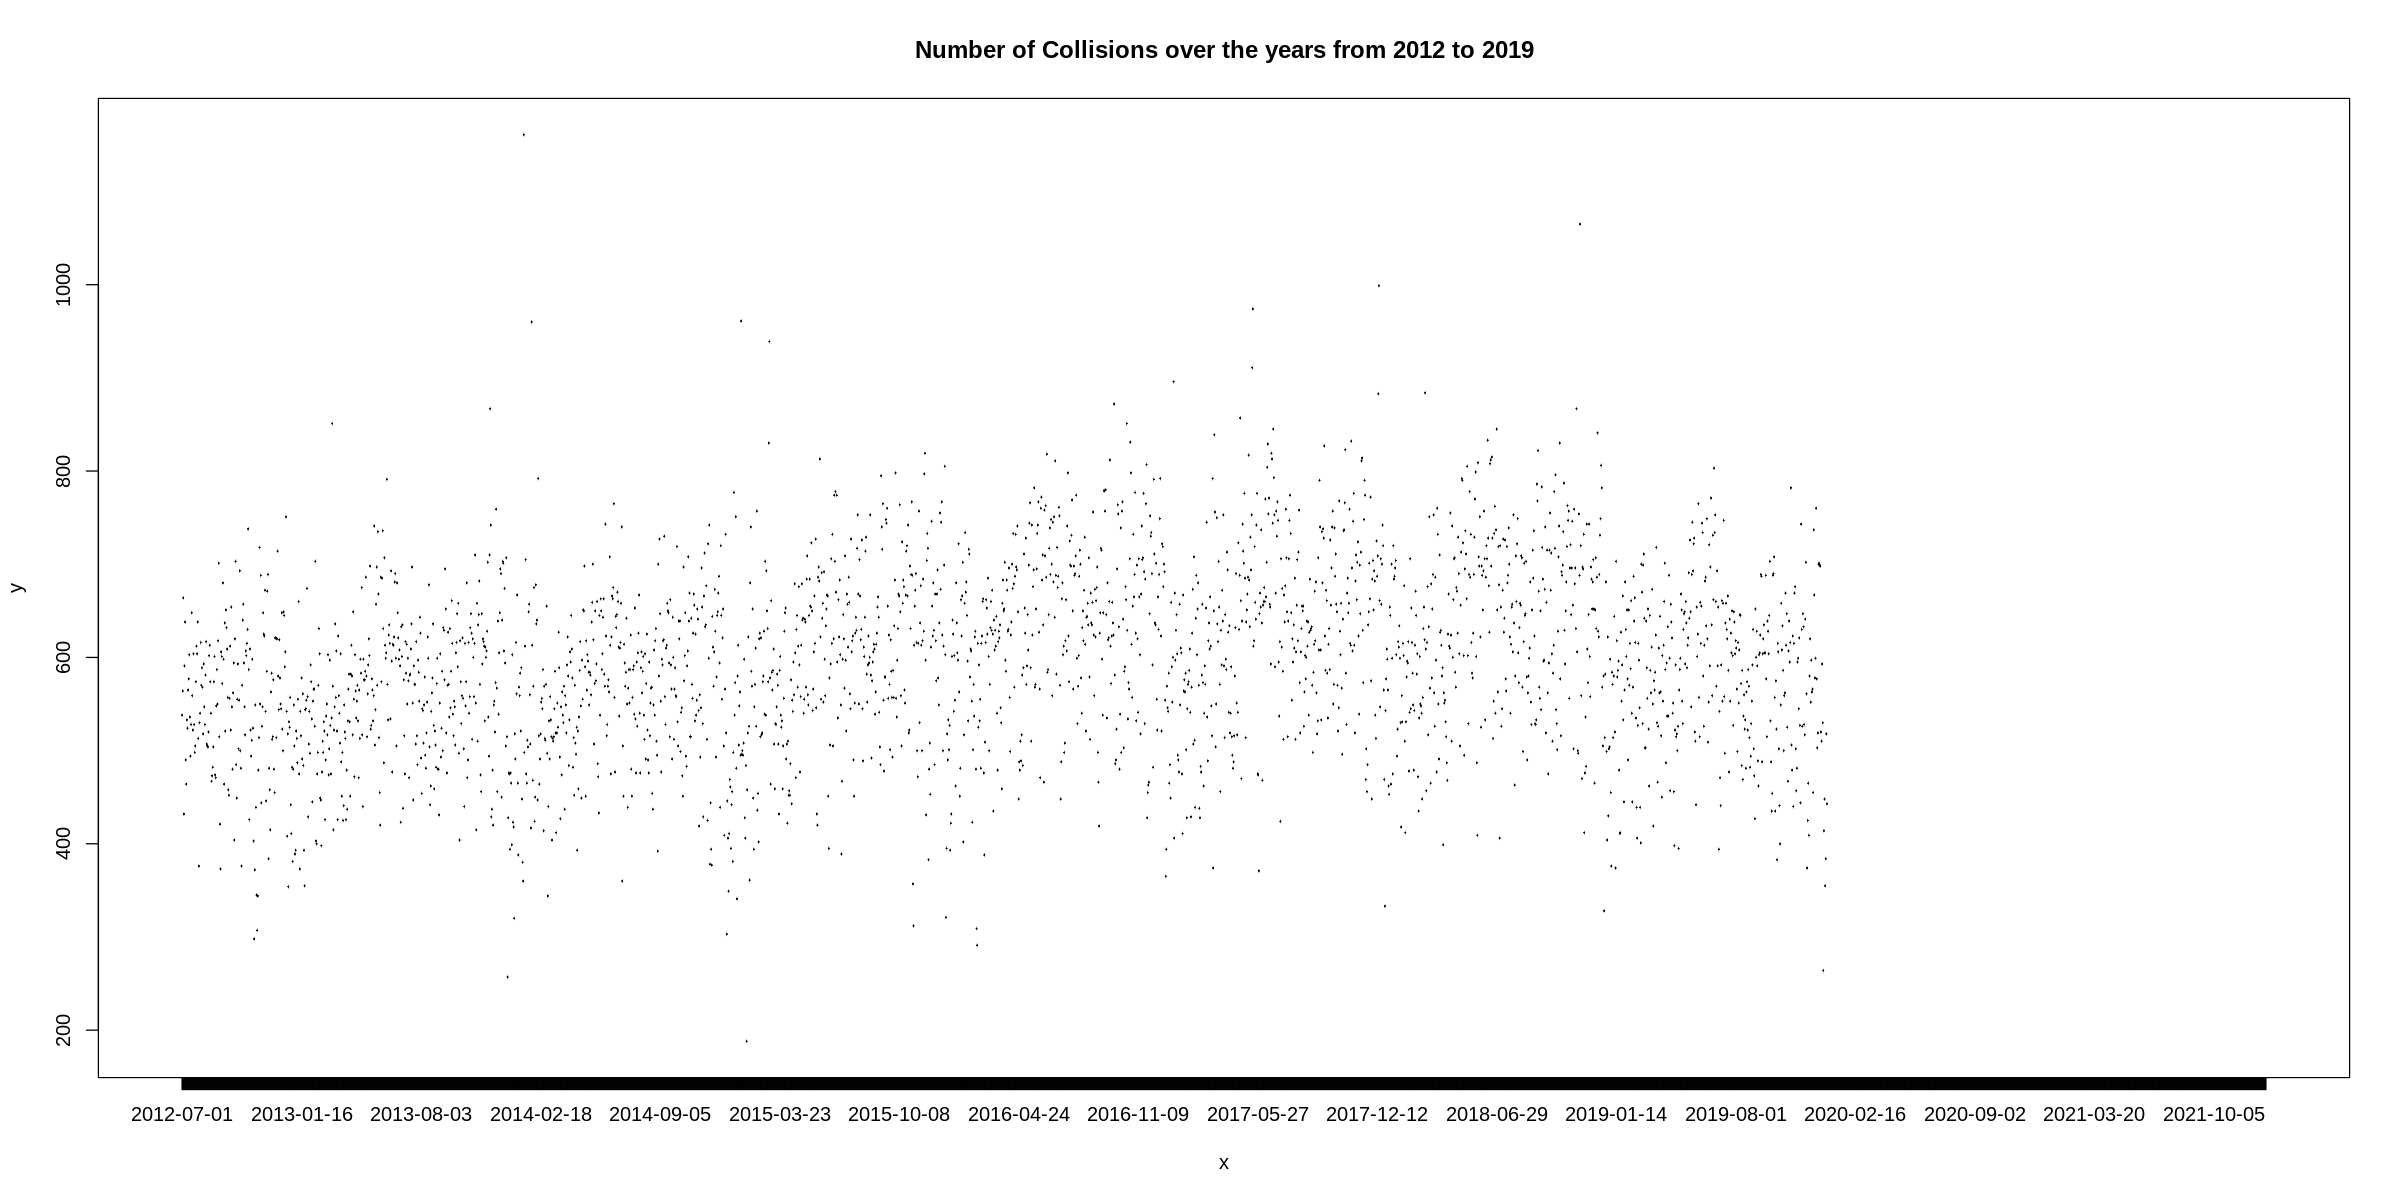

In [15]:
#plot the graph
plot(nycollupto2019$collision_date, nycollupto2019$NUM_COLLISIONS, main="Number of Collisions over the years from 2012 to 2019")

By looking at above graph, it can be observed that values are fluctuating over the years that means there is some kind of seasonal effect on number of collisions. For example, there might be more collisions during summer months as more people would be out on streets or during winter where it might be difficult to control the vehicles.

Another thing is that correlation between day of week and collisions is improved from 0.2 to 0.4 after removing the Covid-19 affected years as shown below.

In [16]:
cor(nycollupto2019$day, nycollupto2019$NUM_COLLISIONS)


[1] 0.4976168


**Seasonality vs collisions Analysis**

This can be better analysed by splitting the data by each year and seeing it on a color-coded graph.


In [17]:
nycollsplitcheck <- nycollupto2019

In [18]:
nycoll2012 <- nycollsplitcheck[which(nycollsplitcheck$year == 2012), ]

In [19]:
# Note for 2021, we need add 181 as we have data from 1st July.
dayofyear <- 1*seq_len(nrow(nycoll2012)) + 181
dayindex <-  1*seq_len(nrow(nycoll2012)) 
nycoll2012a <- cbind(dayindex, dayofyear, nycoll2012)

Now let's do it for other years.

In [20]:
# 2013
nycoll2013 <- nycollsplitcheck[which(nycollsplitcheck$year == 2013), ]
dayofyear <- 1*seq_len(nrow(nycoll2013))
dayindex <- 1*seq_len(nrow(nycoll2013)) + 181
nycoll2013a <- cbind(dayindex, dayofyear, nycoll2013)

#2014
nycoll2014 <- nycollsplitcheck[which(nycollsplitcheck$year == 2014), ]
dayofyear <- 1*seq_len(nrow(nycoll2014))
dayindex <- 1*seq_len(nrow(nycoll2014)) + 546
nycoll2014a <- cbind(dayindex, dayofyear, nycoll2014)

#2015
nycoll2015 <- nycollsplitcheck[which(nycollsplitcheck$year == 2015), ]
dayofyear <- 1*seq_len(nrow(nycoll2015))
dayindex <- 1*seq_len(nrow(nycoll2015)) + 911
nycoll2015a <- cbind(dayindex, dayofyear, nycoll2015)

#2016
nycoll2016 <- nycollsplitcheck[which(nycollsplitcheck$year == 2016), ]
dayofyear <- 1*seq_len(nrow(nycoll2016))
dayindex <- 1*seq_len(nrow(nycoll2016)) + 1276
nycoll2016a <- cbind(dayindex, dayofyear, nycoll2016)

#2017
nycoll2017 <- nycollsplitcheck[which(nycollsplitcheck$year == 2017), ]
dayofyear <- 1*seq_len(nrow(nycoll2017))
dayindex <- 1*seq_len(nrow(nycoll2017)) + 1642
nycoll2017a <- cbind(dayindex, dayofyear, nycoll2017)

#2018
nycoll2018 <- nycollsplitcheck[which(nycollsplitcheck$year == 2018), ]
dayofyear <- 1*seq_len(nrow(nycoll2018))
dayindex <- 1*seq_len(nrow(nycoll2018)) + 2007
nycoll2018a <- cbind(dayindex, dayofyear, nycoll2018)

#2019
nycoll2019 <- nycollsplitcheck[which(nycollsplitcheck$year == 2019), ]
dayofyear <- 1*seq_len(nrow(nycoll2019))
dayindex <- 1*seq_len(nrow(nycoll2019)) + 2372
nycoll2019a <- cbind(dayindex, dayofyear, nycoll2019)




Next data is visualised in chunks of 4 years.
Below command shows graph which covers years from 2012 to 2015.

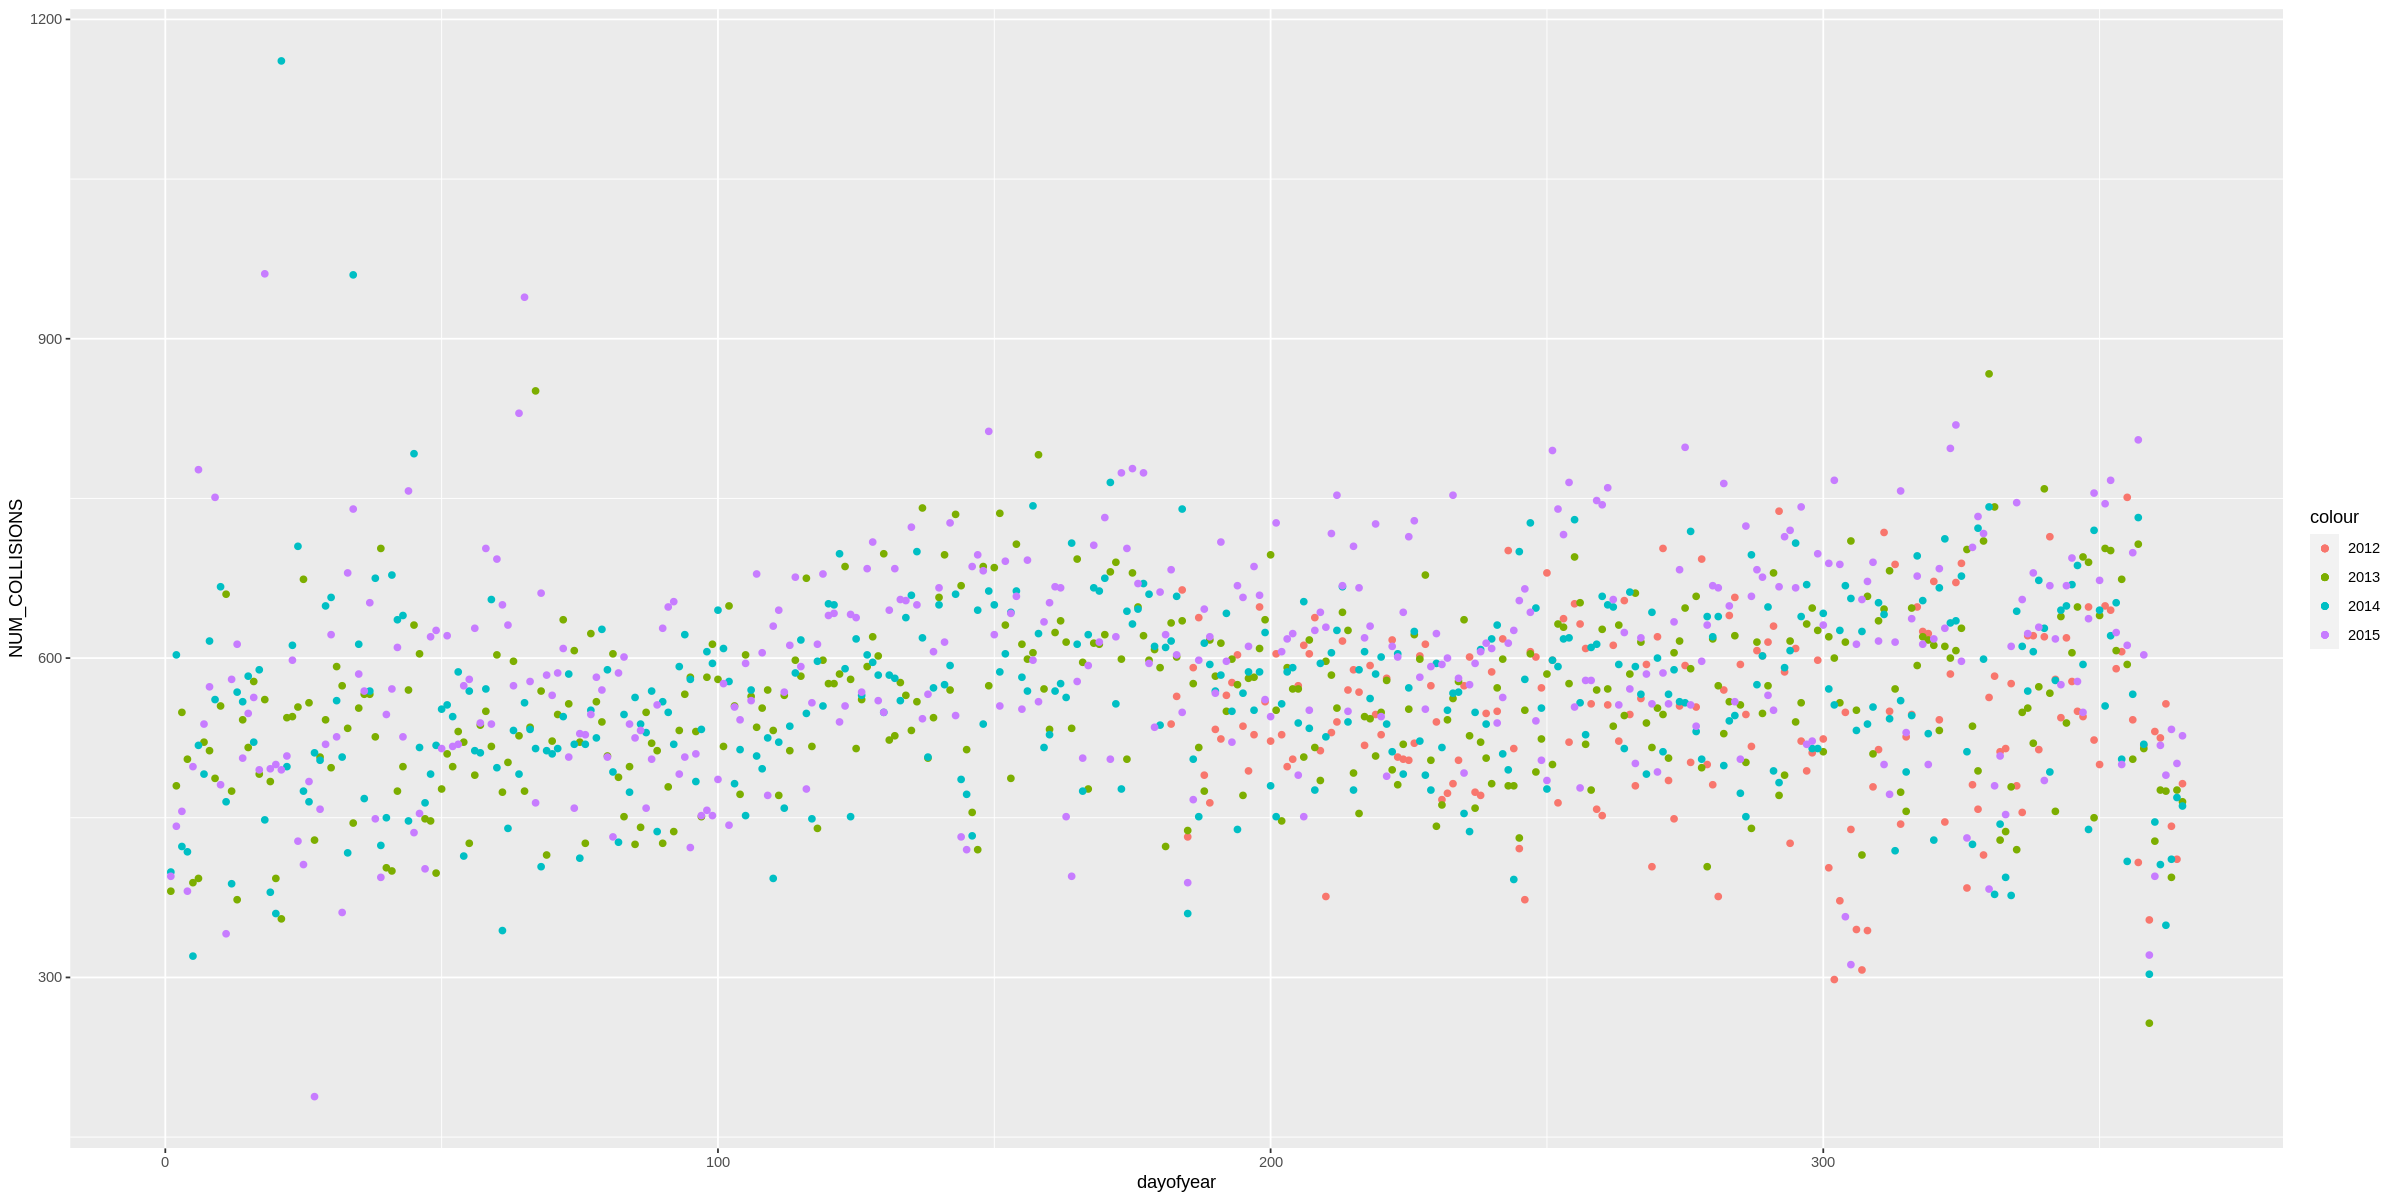

In [21]:
library(ggplot2)

ggplot() +
  geom_point(data=nycoll2012a, aes(dayofyear, NUM_COLLISIONS, color="2012")) +
  geom_point(data=nycoll2013a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=nycoll2014a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=nycoll2015a, aes(dayofyear, NUM_COLLISIONS, color="2015")) 
  
 

Below command shows data for years 2016 to 2019.

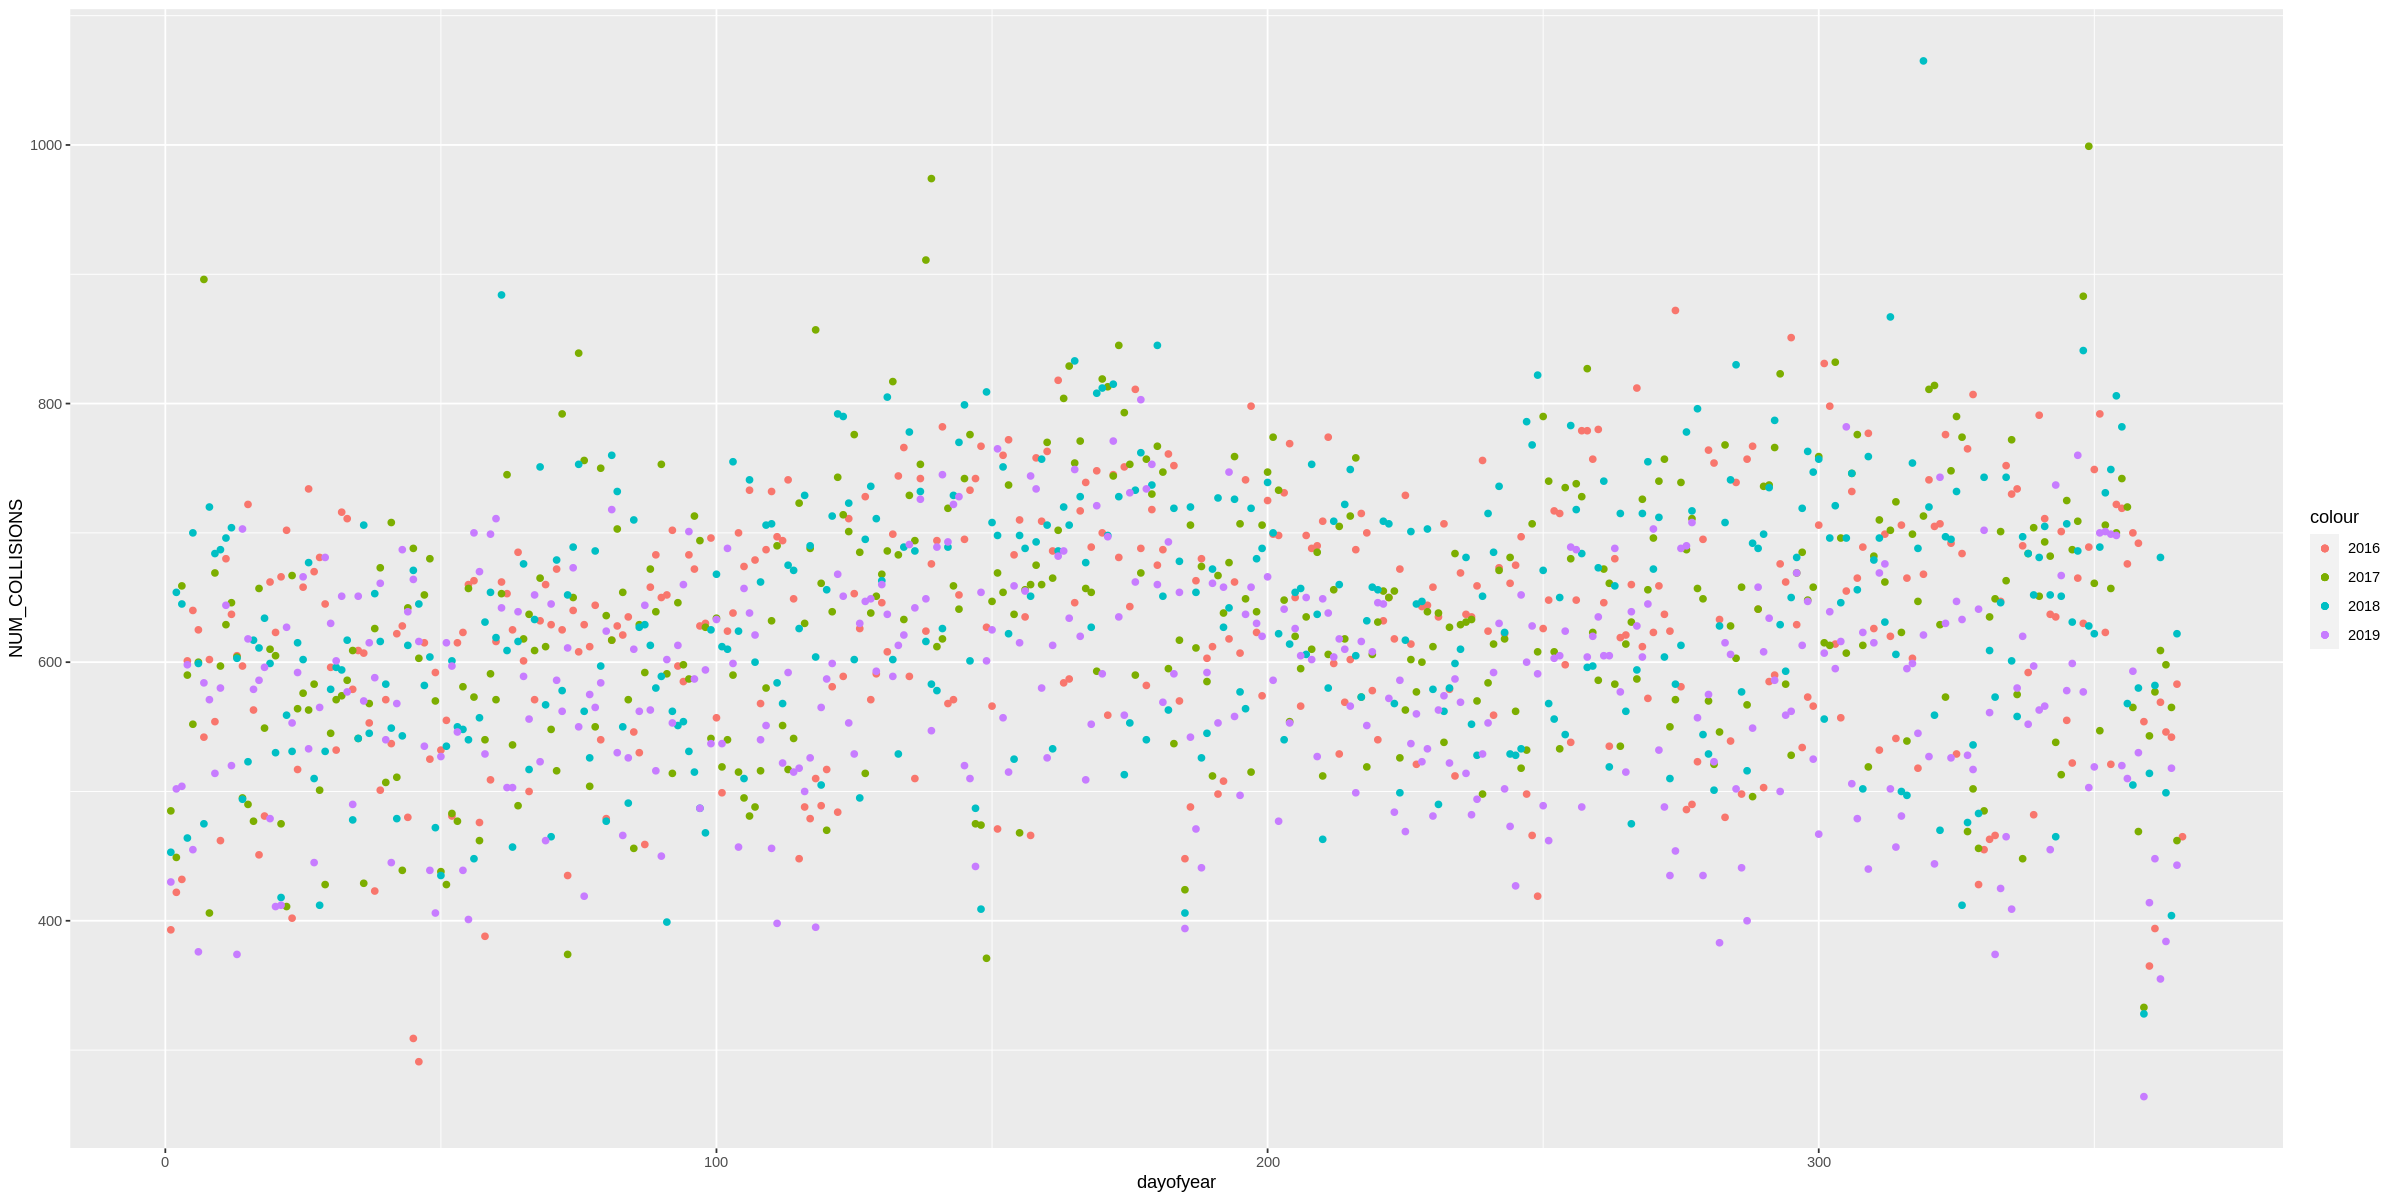

In [22]:
ggplot() +
  geom_point(data=nycoll2016a, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=nycoll2017a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=nycoll2018a, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=nycoll2019a, aes(dayofyear, NUM_COLLISIONS, color="2019"))

In both of above graphs, it can be observed that there is a peak between days 150 to 180 which is for month of **June** which is peak summer season along with school holidays and more people would be out. 

There is another peak around day 300 which around end of October and Beginning of November where people would be doing shopping for Halloween and Christmas.

Also, from both graphs, another thing we can see is that there are lot of outliers which should be removed to build accurate prediction models.

This seasonality effect and outliners can be visualized by using below Graph where all years data is plotted on same graph but with different colors.

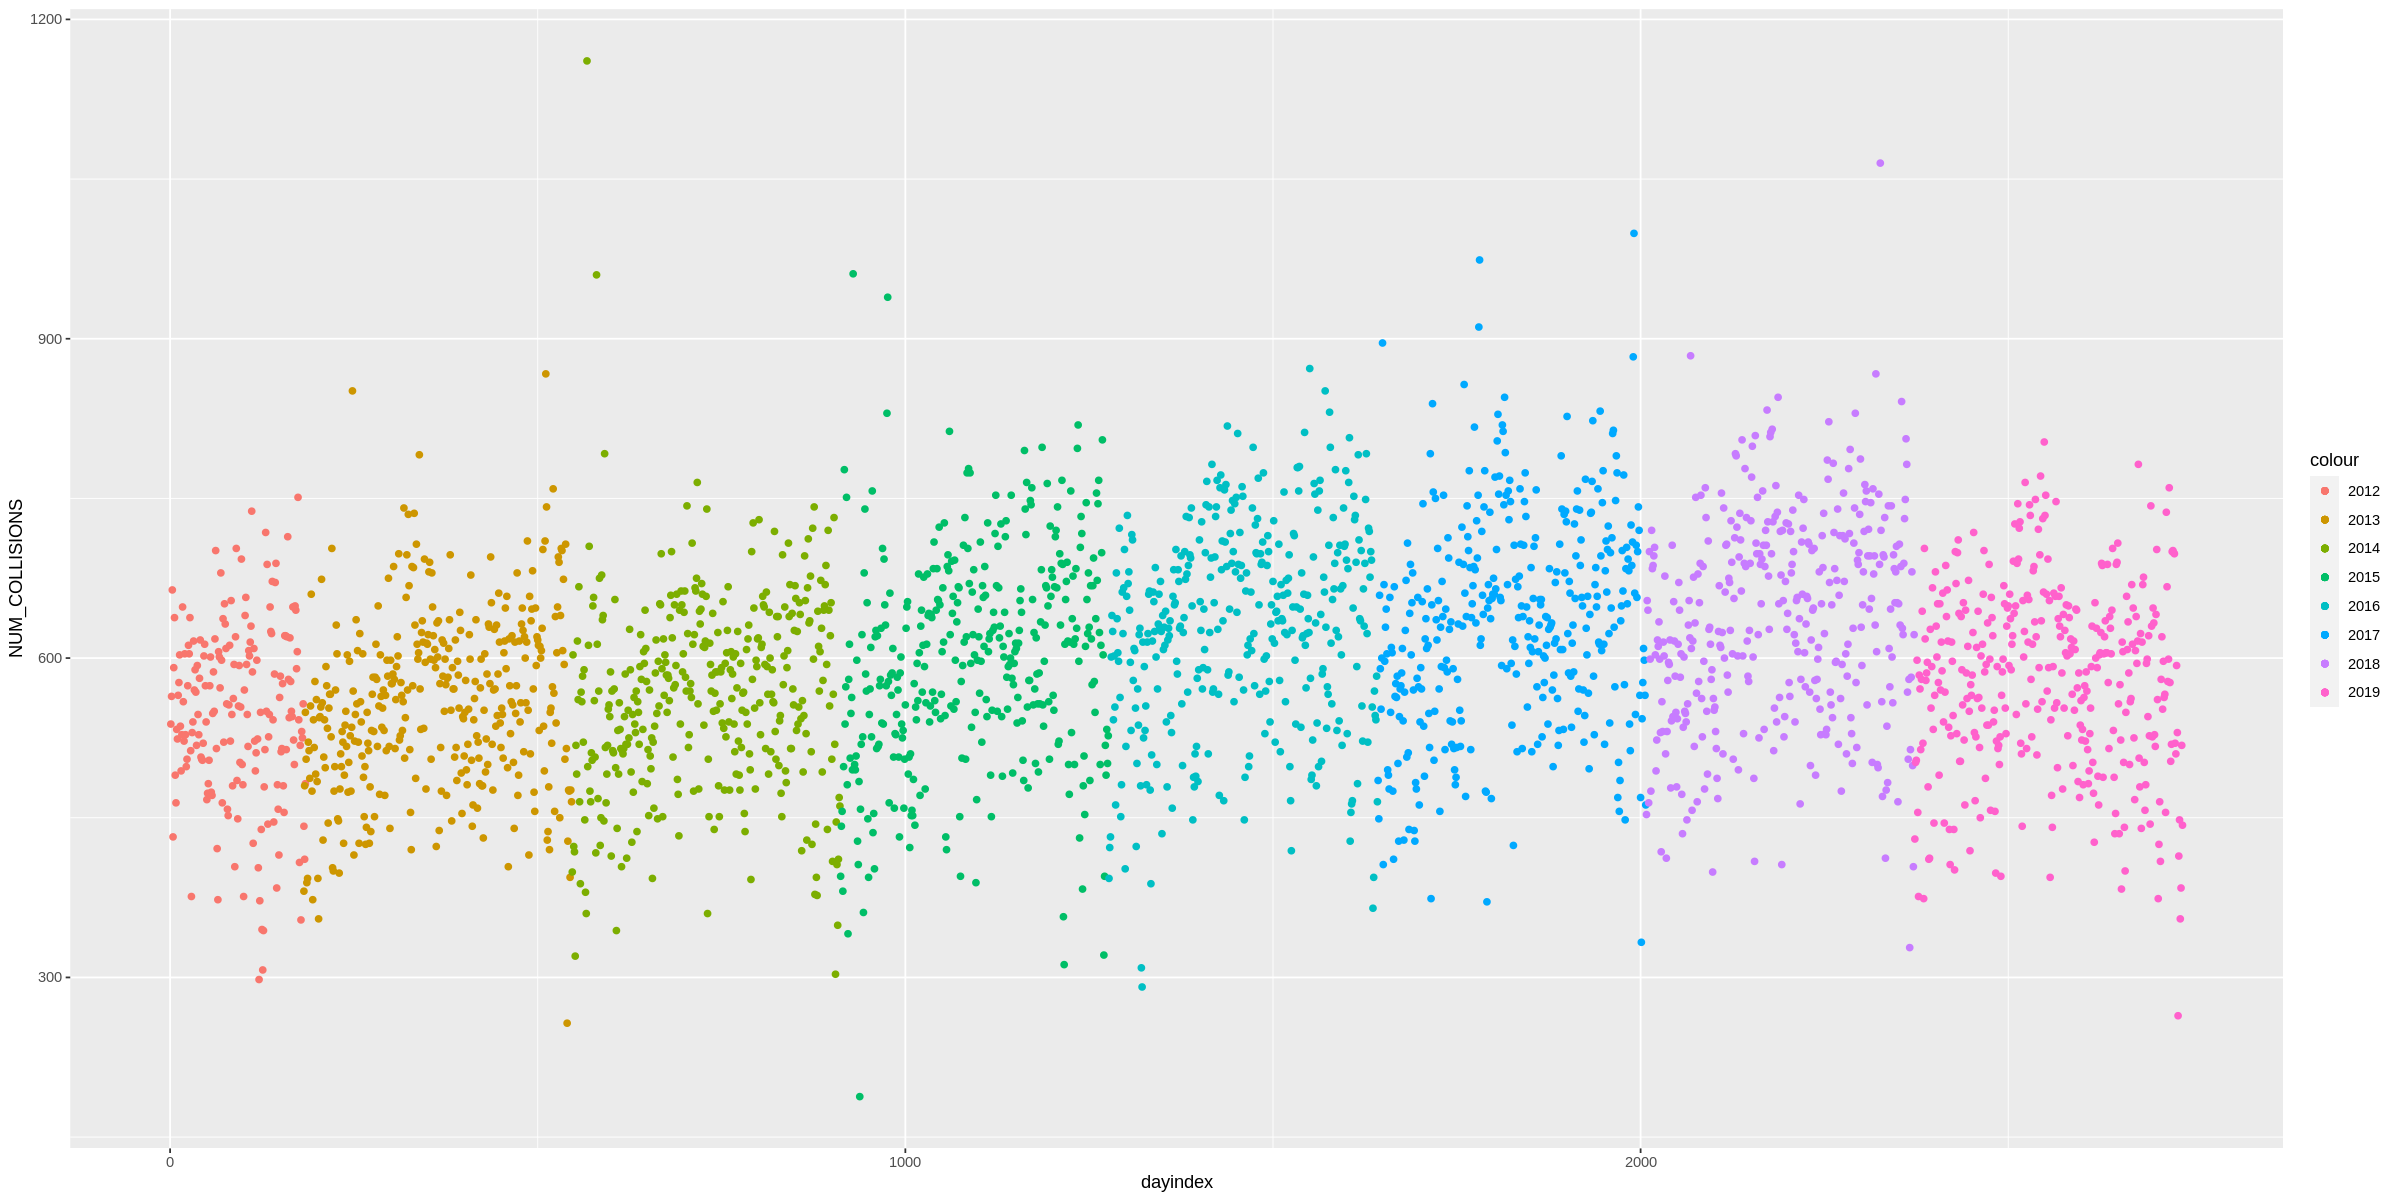

In [23]:
ggplot() +
  geom_point(data=nycoll2012a, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=nycoll2013a, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=nycoll2014a, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=nycoll2015a, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=nycoll2016a, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=nycoll2017a, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=nycoll2018a, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=nycoll2019a, aes(dayindex, NUM_COLLISIONS, color="2019"))

Next step is to remove the outliners.

Below command will remove outliners depending on which year it is as collision count is different across years.

*   2012: remove collisions more than 750.
*   2013: remove collisions more than 750.
*   2014: remove collisions more than 760.
*   2015: remove collisions more than 800.
*   2016: remove collisions more than 850.
*   2017: remove collisions more than 875.
*   2018: remove collisions more than 875.
*   2019: remove collisions more than 875.

For lower bound, there is not much variation across years, hence collisions below 370 are removed.

Note: Above numbers have been decided after running below steps multiple times and validating it on the graph.


In [24]:
#Remove upper outliners
nycoll2012Trunc <- nycoll2012a[which(nycoll2012a$NUM_COLLISIONS <= 725), ]
nycoll2013Trunc <- nycoll2013a[which(nycoll2013a$NUM_COLLISIONS <= 725), ]
nycoll2014Trunc <- nycoll2014a[which(nycoll2014a$NUM_COLLISIONS <= 740), ]
nycoll2015Trunc <- nycoll2015a[which(nycoll2015a$NUM_COLLISIONS <= 790), ]
nycoll2016Trunc <- nycoll2016a[which(nycoll2016a$NUM_COLLISIONS <= 800), ]
nycoll2017Trunc <- nycoll2017a[which(nycoll2017a$NUM_COLLISIONS <= 800), ]
nycoll2018Trunc <- nycoll2018a[which(nycoll2018a$NUM_COLLISIONS <= 800), ]
nycoll2019Trunc <- nycoll2019a[which(nycoll2019a$NUM_COLLISIONS <= 780), ]

#Remove upper outliners
nycoll2012TruncFinal <- nycoll2012Trunc[which(nycoll2012Trunc$NUM_COLLISIONS >= 370), ]
nycoll2013TruncFinal <- nycoll2013Trunc[which(nycoll2013Trunc$NUM_COLLISIONS >= 370), ]
nycoll2014TruncFinal <- nycoll2014Trunc[which(nycoll2014Trunc$NUM_COLLISIONS >= 370), ]
nycoll2015TruncFinal <- nycoll2015Trunc[which(nycoll2015Trunc$NUM_COLLISIONS >= 370), ]
nycoll2016TruncFinal <- nycoll2016Trunc[which(nycoll2016Trunc$NUM_COLLISIONS >= 370), ]
nycoll2017TruncFinal <- nycoll2017Trunc[which(nycoll2017Trunc$NUM_COLLISIONS >= 370), ]
nycoll2018TruncFinal <- nycoll2018Trunc[which(nycoll2018Trunc$NUM_COLLISIONS >= 370), ]
nycoll2019TruncFinal <- nycoll2019Trunc[which(nycoll2019Trunc$NUM_COLLISIONS >= 370), ]


Now collisions over the years are visualized again to confirm if outliners are removed properly.

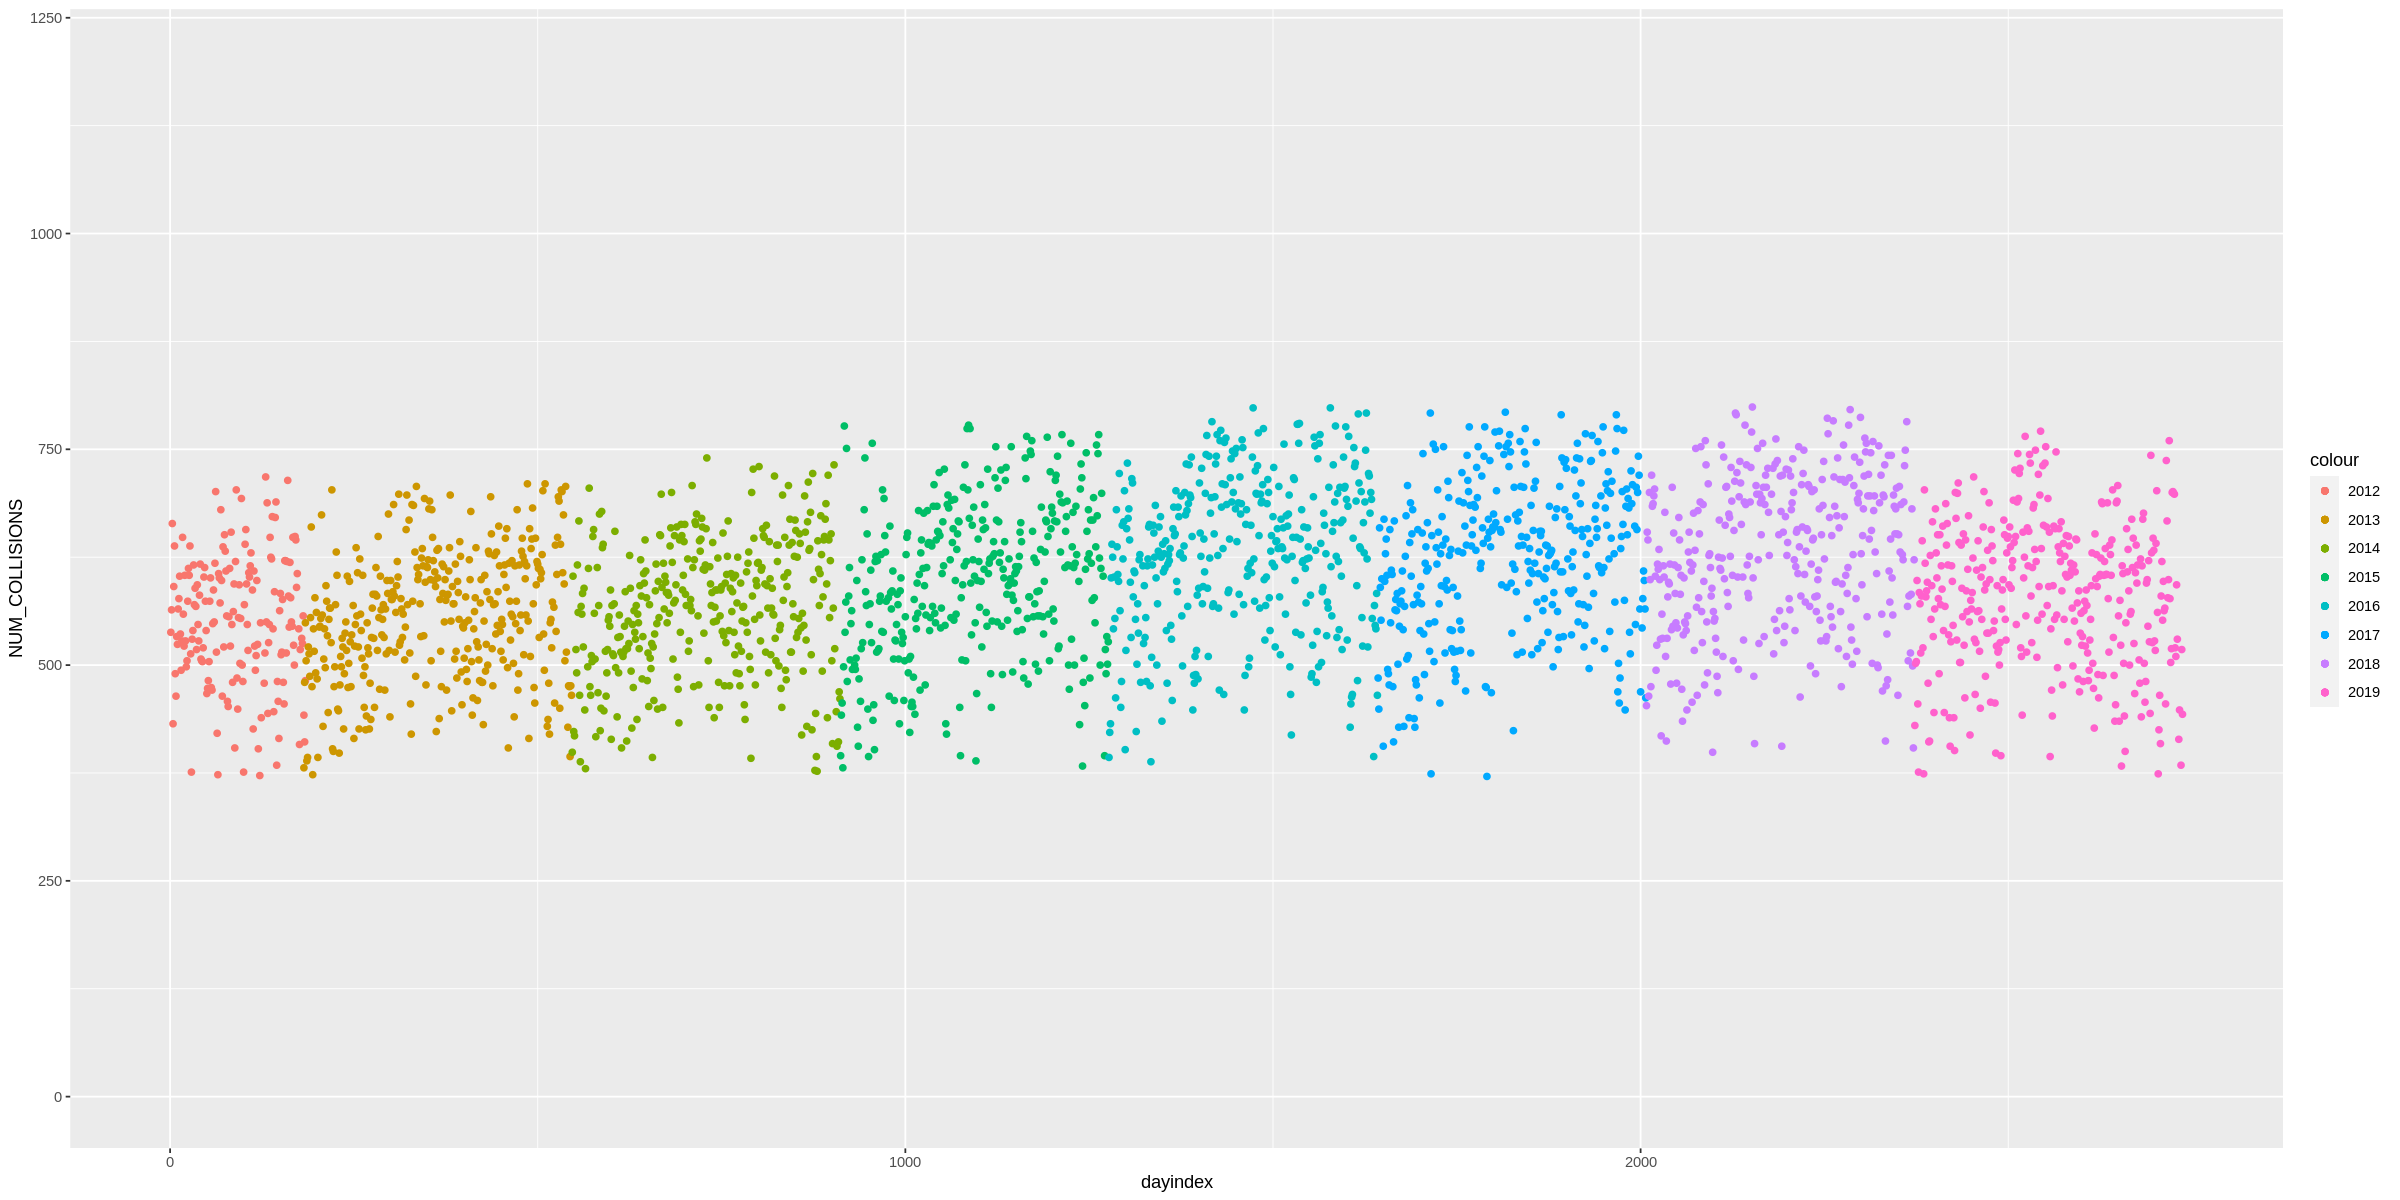

In [25]:
sp <- ggplot() +
  geom_point(data=nycoll2012TruncFinal, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=nycoll2013TruncFinal, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=nycoll2014TruncFinal, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=nycoll2015TruncFinal, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=nycoll2016TruncFinal, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=nycoll2017TruncFinal, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=nycoll2018TruncFinal, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=nycoll2019TruncFinal, aes(dayindex, NUM_COLLISIONS, color="2019"))

sp+ylim(0, 1200)

We can see above that outliners are removed, and graph looks much better than earlier version.

Now, impact of various weather attributes on collisions is analysed.

**Temperature vs Collisions Analysis**

First, temperate is plotted against collisions as shown below.

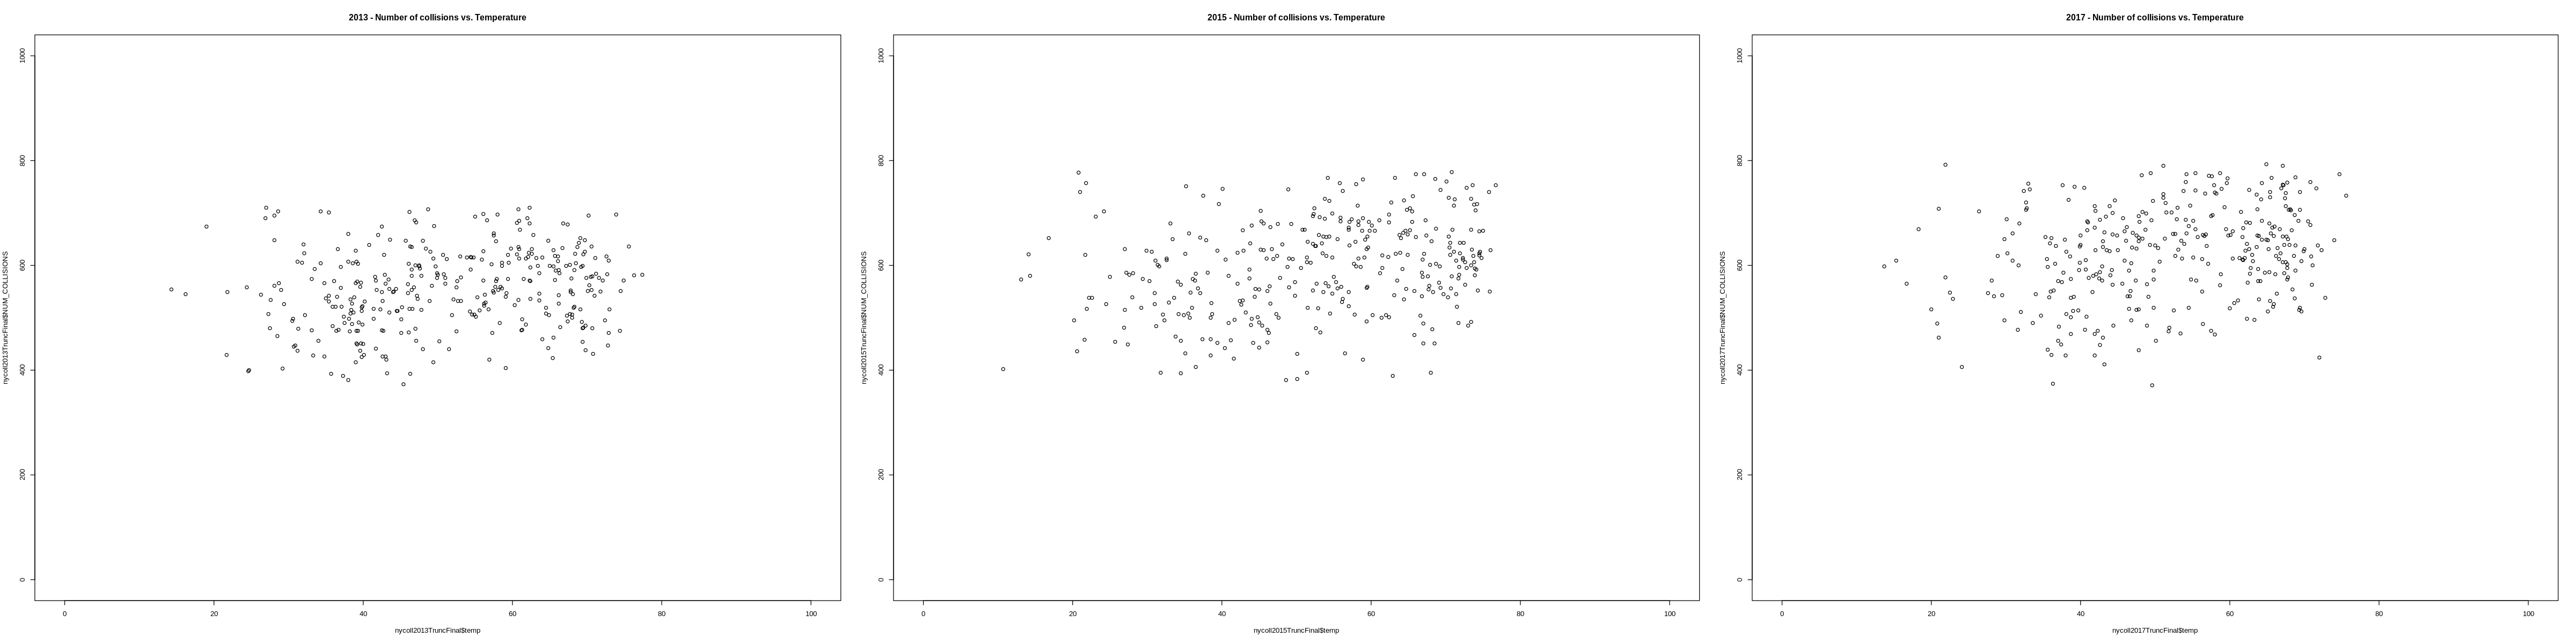

In [26]:
#increase graph width
options(repr.plot.width=40, repr.plot.height=10)

par(mfrow=c(1,3))


plot(nycoll2013TruncFinal$temp, nycoll2013TruncFinal$NUM_COLLISIONS, main="2013 - Number of collisions vs. Temperature", xlim=c(0,100), ylim=c(0,1000))
plot(nycoll2015TruncFinal$temp, nycoll2015TruncFinal$NUM_COLLISIONS, main="2015 - Number of collisions vs. Temperature", xlim=c(0,100), ylim=c(0,1000))
plot(nycoll2017TruncFinal$temp, nycoll2017TruncFinal$NUM_COLLISIONS, main="2017 - Number of collisions vs. Temperature", xlim=c(0,100), ylim=c(0,1000))


We can see from above graph a very minor linear relation between temperature and collisions. Collisions seems to be more between 60 to 80 than other temperature ranges. This slight correlation can be confirmed from below command. Hence this column will be kept for making prediction models. 

In [27]:
cor(nycoll2013TruncFinal$temp, nycoll2013TruncFinal$NUM_COLLISIONS)
cor(nycoll2015TruncFinal$temp, nycoll2015TruncFinal$NUM_COLLISIONS)
cor(nycoll2017TruncFinal$temp, nycoll2017TruncFinal$NUM_COLLISIONS)


[1] 0.1945309

[1] 0.2776993

[1] 0.2506714

**Precipitation  vs Collisions Analysis**

Graph of precipitation  and Collision is plotted and shown below. It can be seen that most of the records have 0 for precipitation  that means no data was recorded. Hence this does not seem to help with prediction.

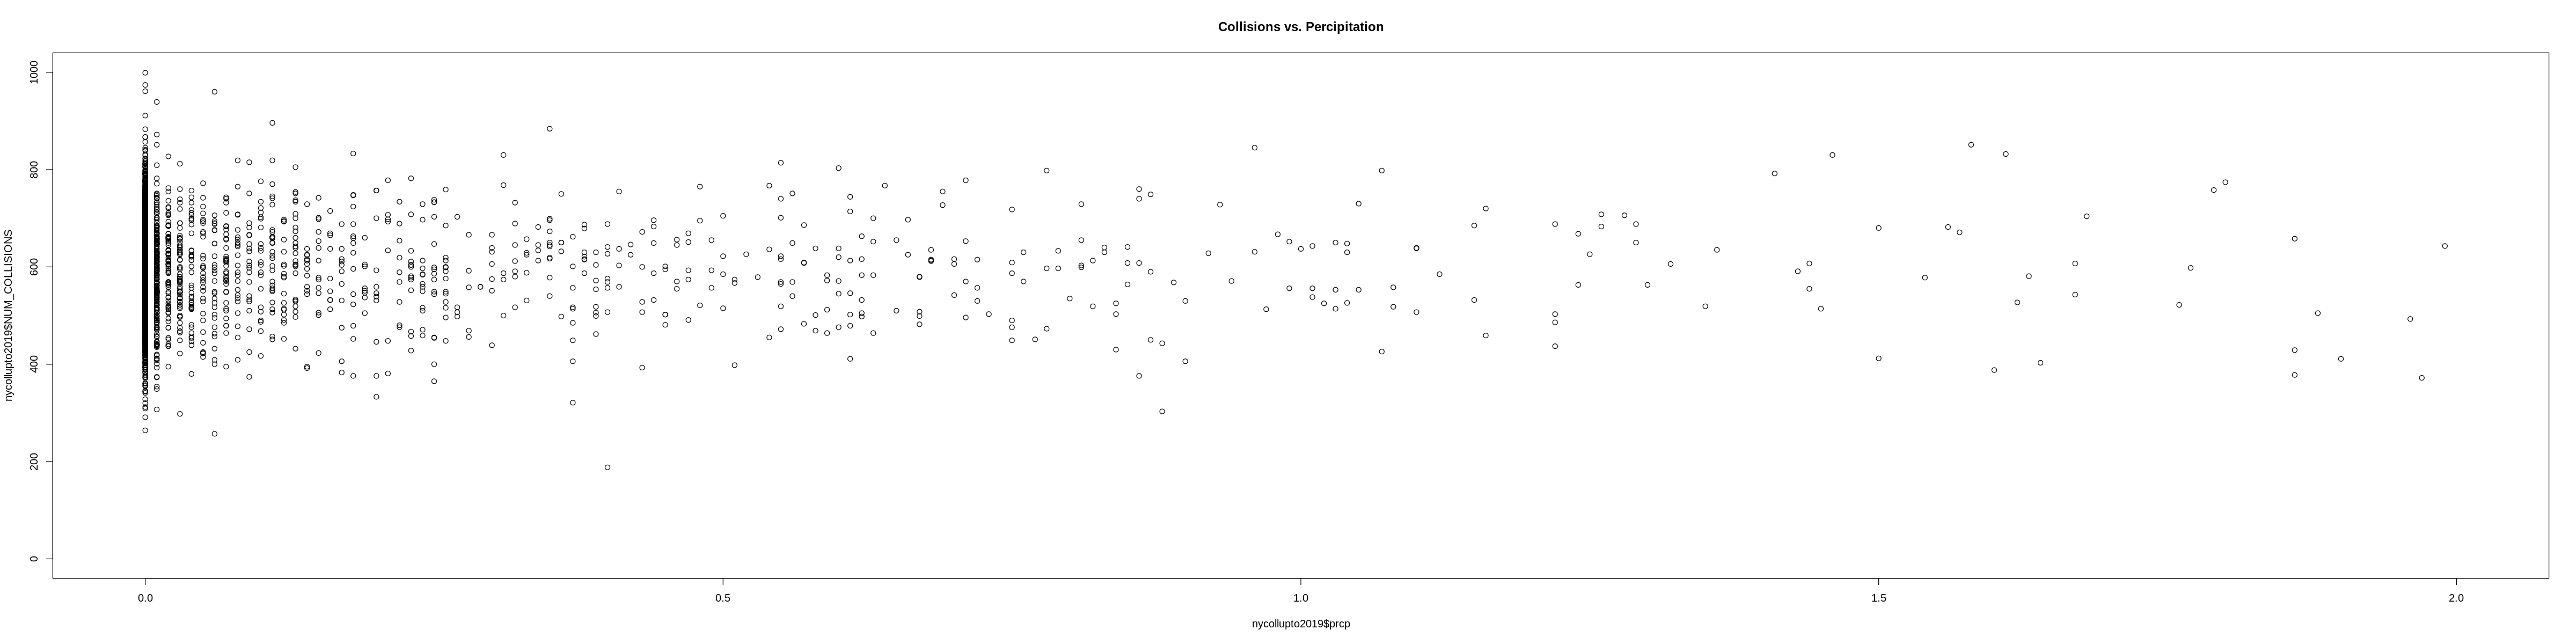

In [28]:
plot(nycollupto2019$prcp, nycollupto2019$NUM_COLLISIONS, main="Collisions vs. Percipitation", xlim=c(0,2), ylim=c(0,1000))

**Windspeed Vs Collisions Analysis**

Below graph shows relation of Windspeed and collisions.


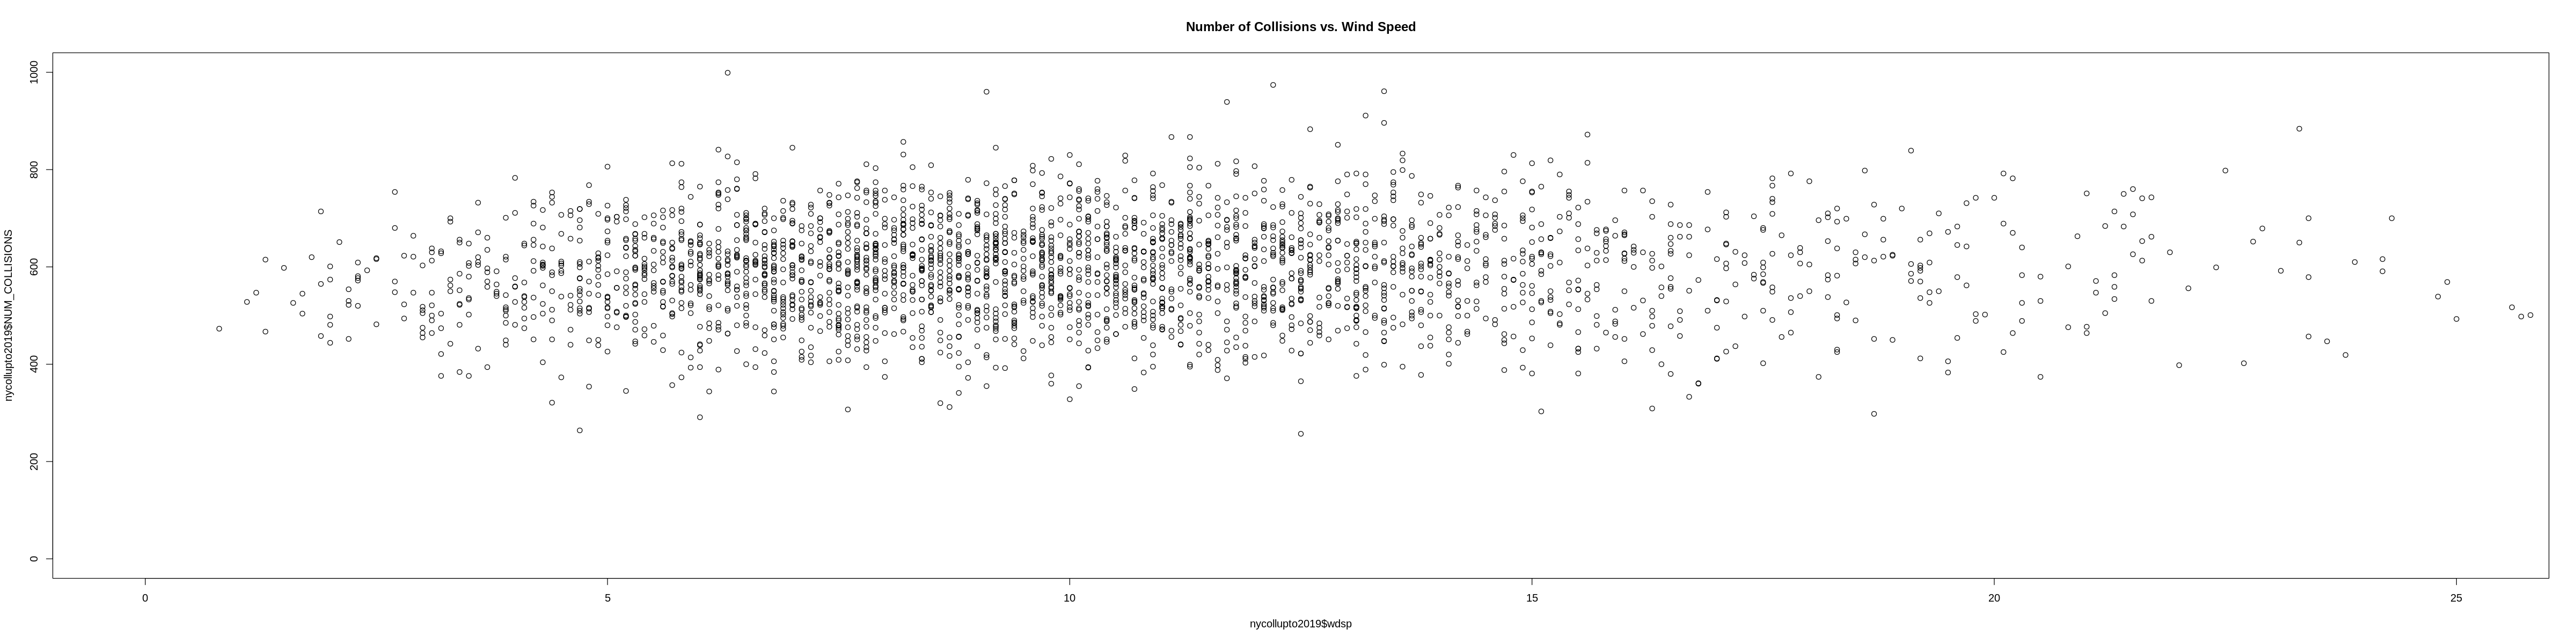

In [29]:
plot(nycollupto2019$wdsp, nycollupto2019$NUM_COLLISIONS, main="Number of Collisions vs. Wind Speed", xlim=c(0,25), ylim=c(0,1000))

In [30]:
cor(nycollupto2019$wdsp, nycollupto2019$NUM_COLLISIONS)

[1] 0.02963705

It can be seen that there is no clear pattern here and very weak positive linear relationship.

**Dew point vs Collisions Analysis**

Below graph shows relation of dew point and collisions.

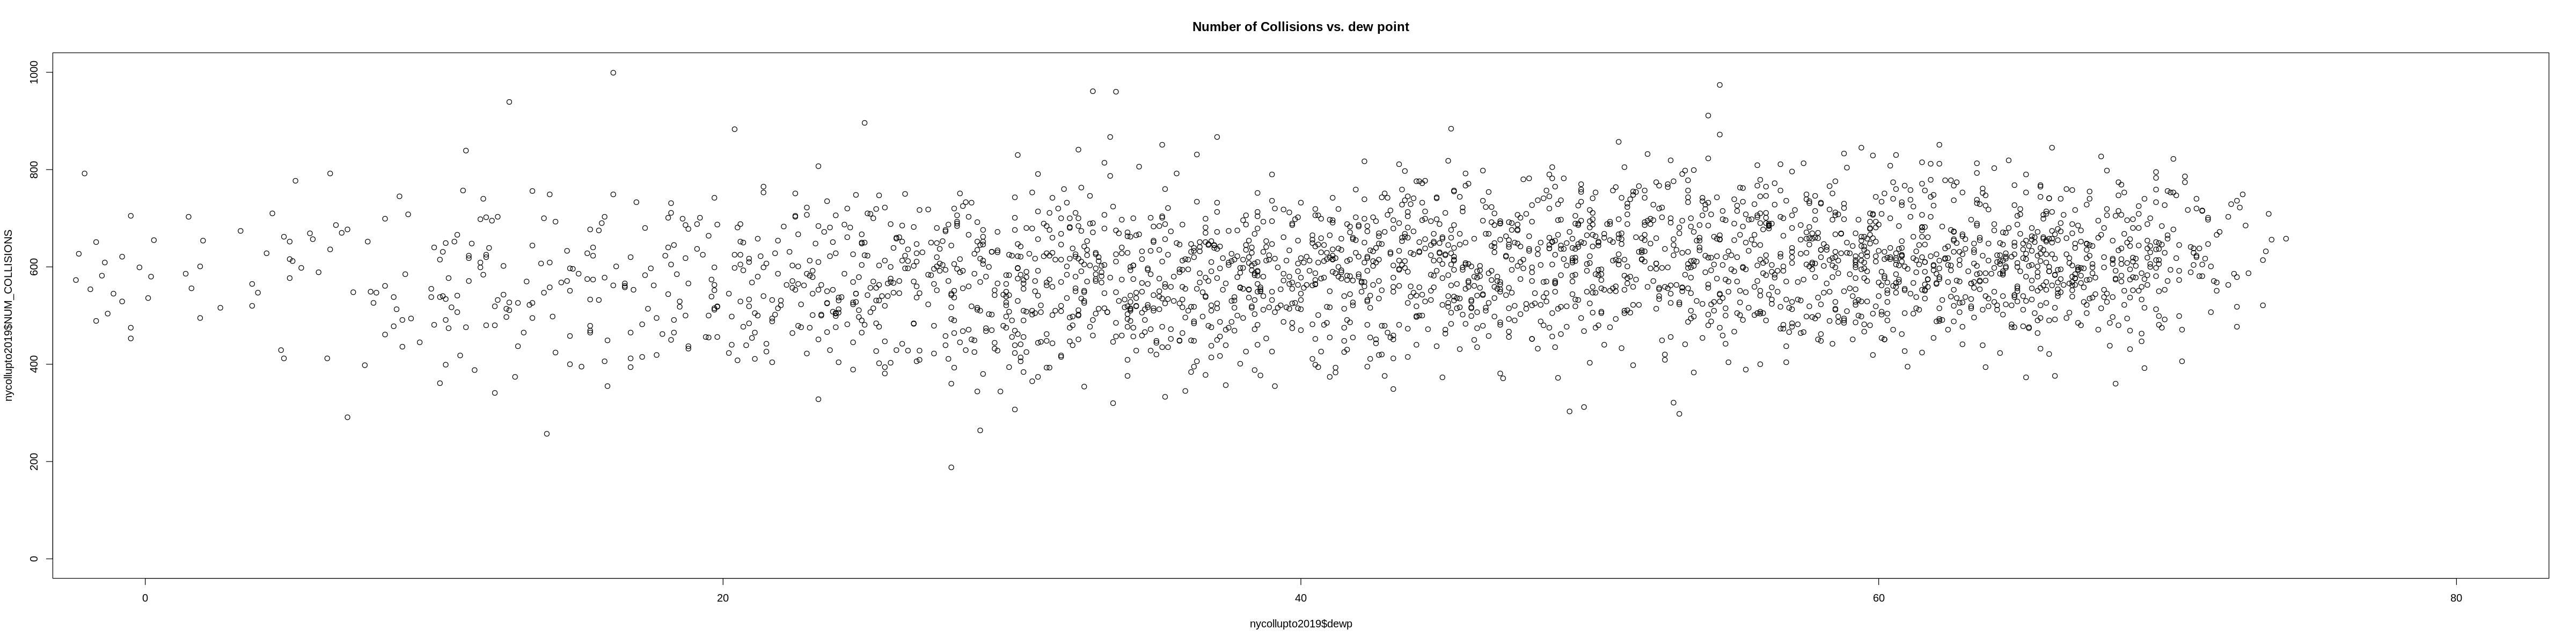

In [31]:
plot(nycollupto2019$dewp, nycollupto2019$NUM_COLLISIONS, main="Number of Collisions vs. dew point", xlim=c(0,80), ylim=c(0,1000))

In [32]:
cor(nycollupto2019$dewp, nycollupto2019$NUM_COLLISIONS)

[1] 0.02091129

Above relation is very similar to wind speed.

**Visibility vs Collisions Analysis**

Below graph shows relation of visibility and collisions.

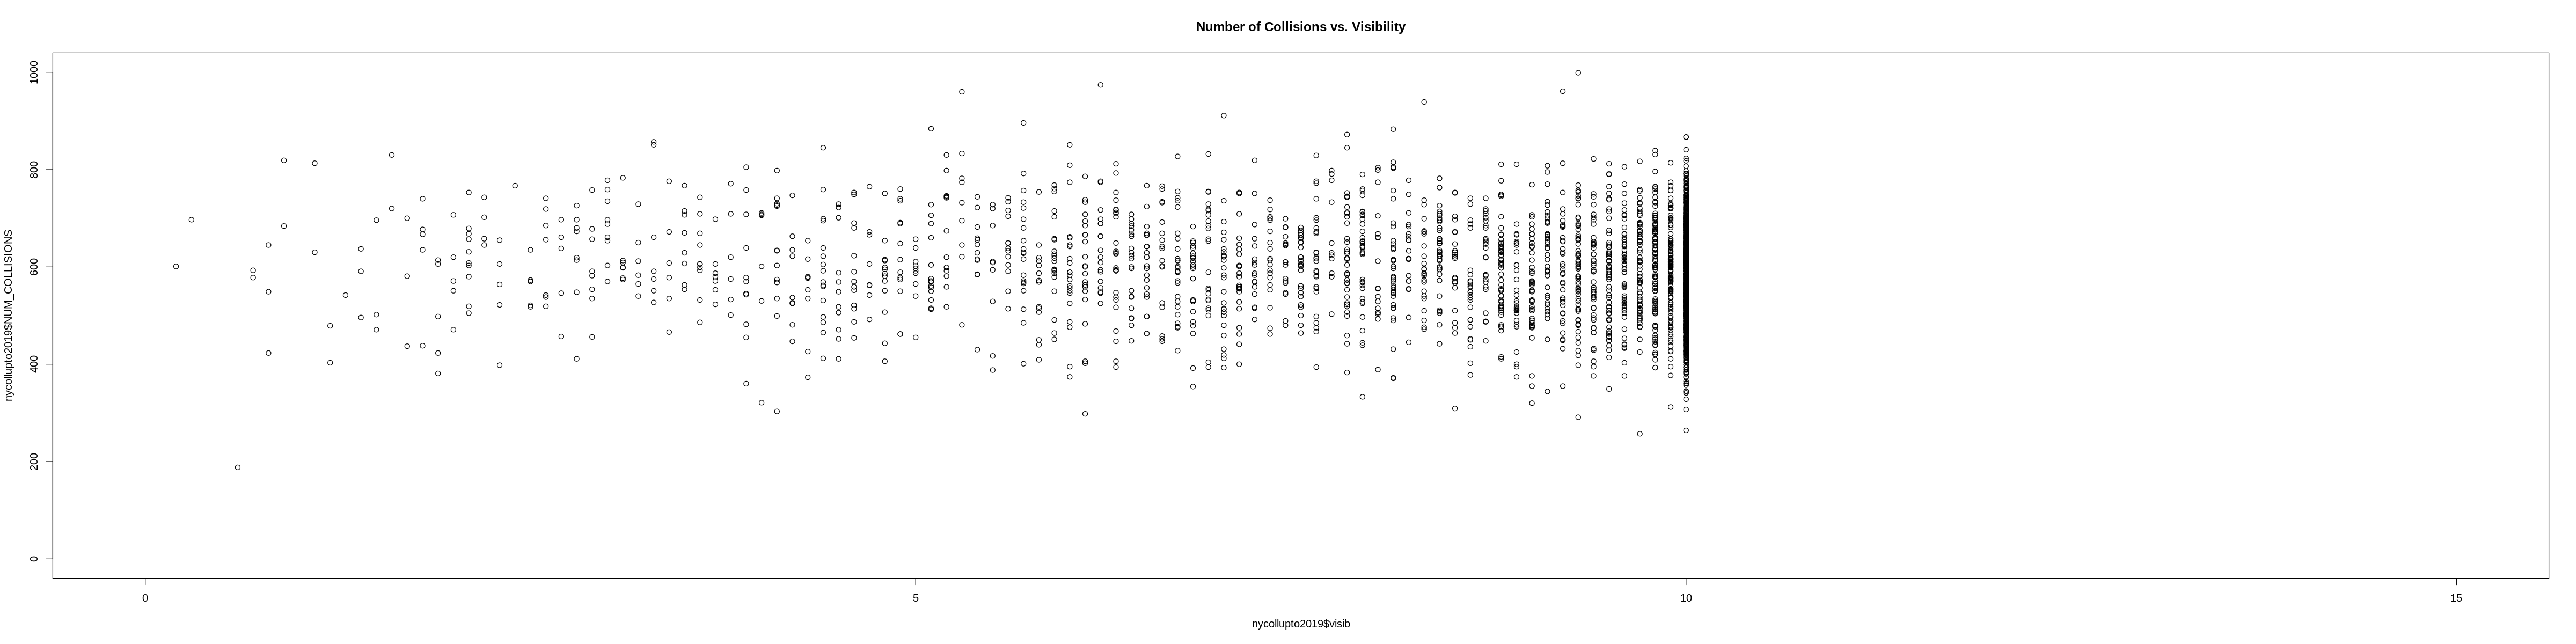

In [33]:
plot(nycollupto2019$visib, nycollupto2019$NUM_COLLISIONS, main="Number of Collisions vs. Visibility", xlim=c(0,15), ylim=c(0,1000))

In [34]:
cor(nycollupto2019$visib, nycollupto2019$NUM_COLLISIONS)

[1] -0.07742423

It can be seen above that most of the records have 10 as visibility and relation is not also linear. Hence visibility is ignored for regression.

**Snow Depth vs Collisions Analysis**

Below graph shows relation of snow depth and collisions.

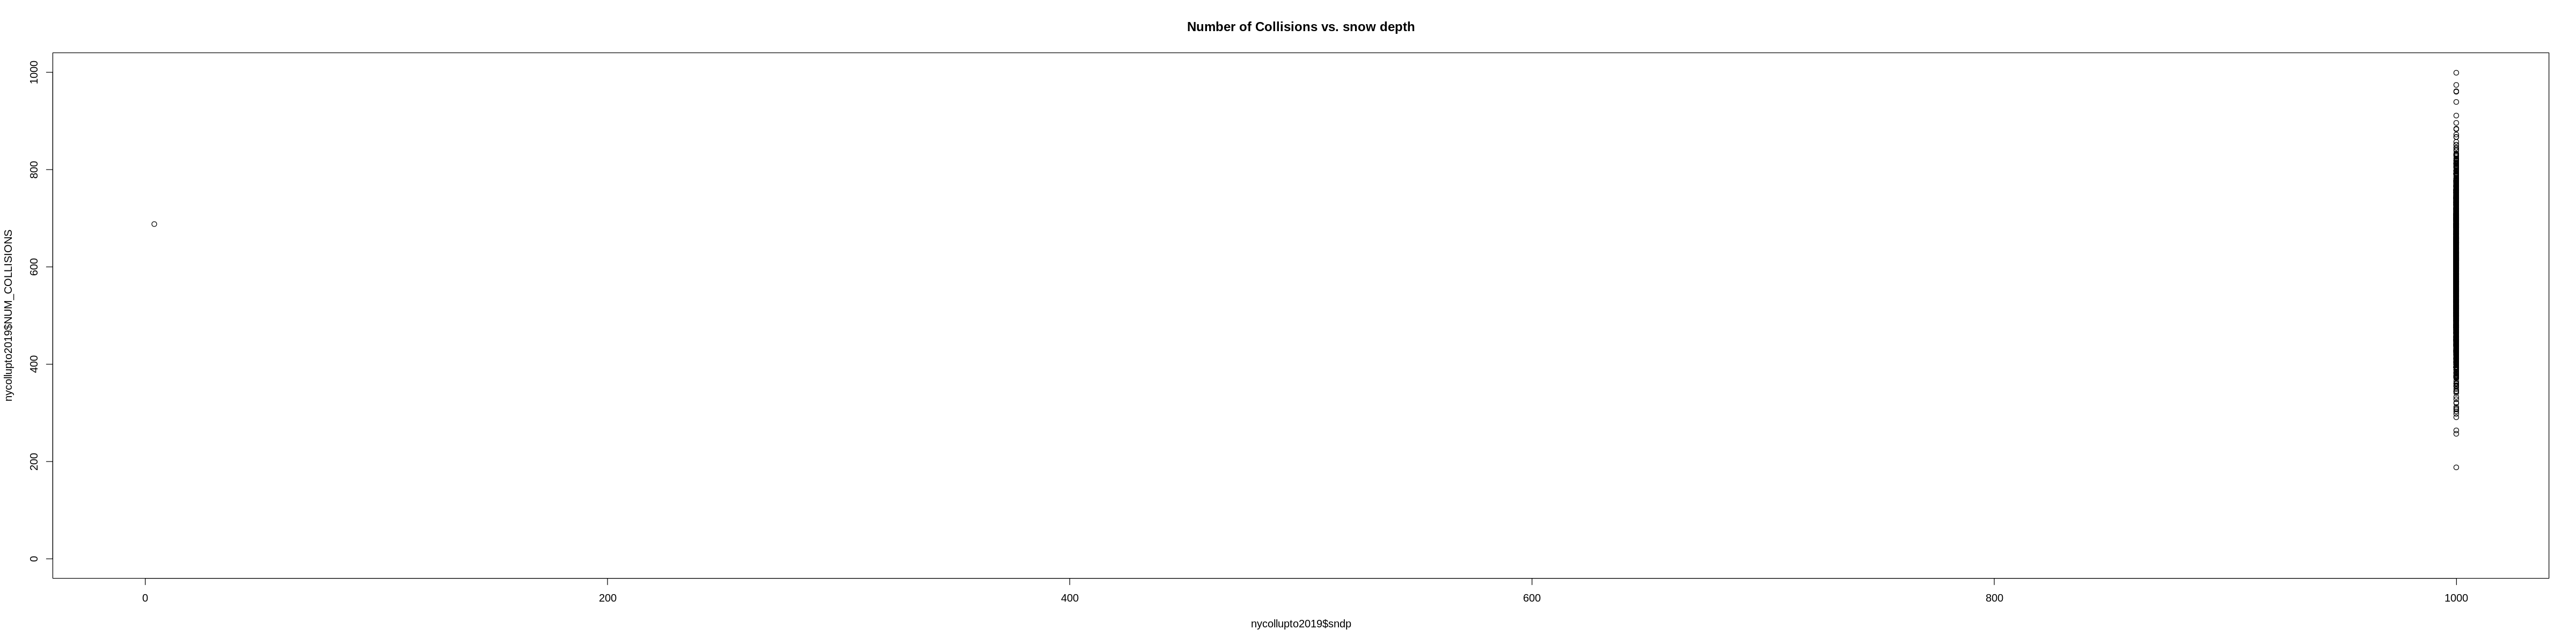

In [35]:
plot(nycollupto2019$sndp, nycollupto2019$NUM_COLLISIONS, main="Number of Collisions vs. snow depth", xlim=c(0,1000), ylim=c(0,1000))

It can be seen that data is completely missing for snow depth, hence snow is ignored for the regression.

**Fog vs Collisions Analysis**

Below graph shows relation of fog and collisions.

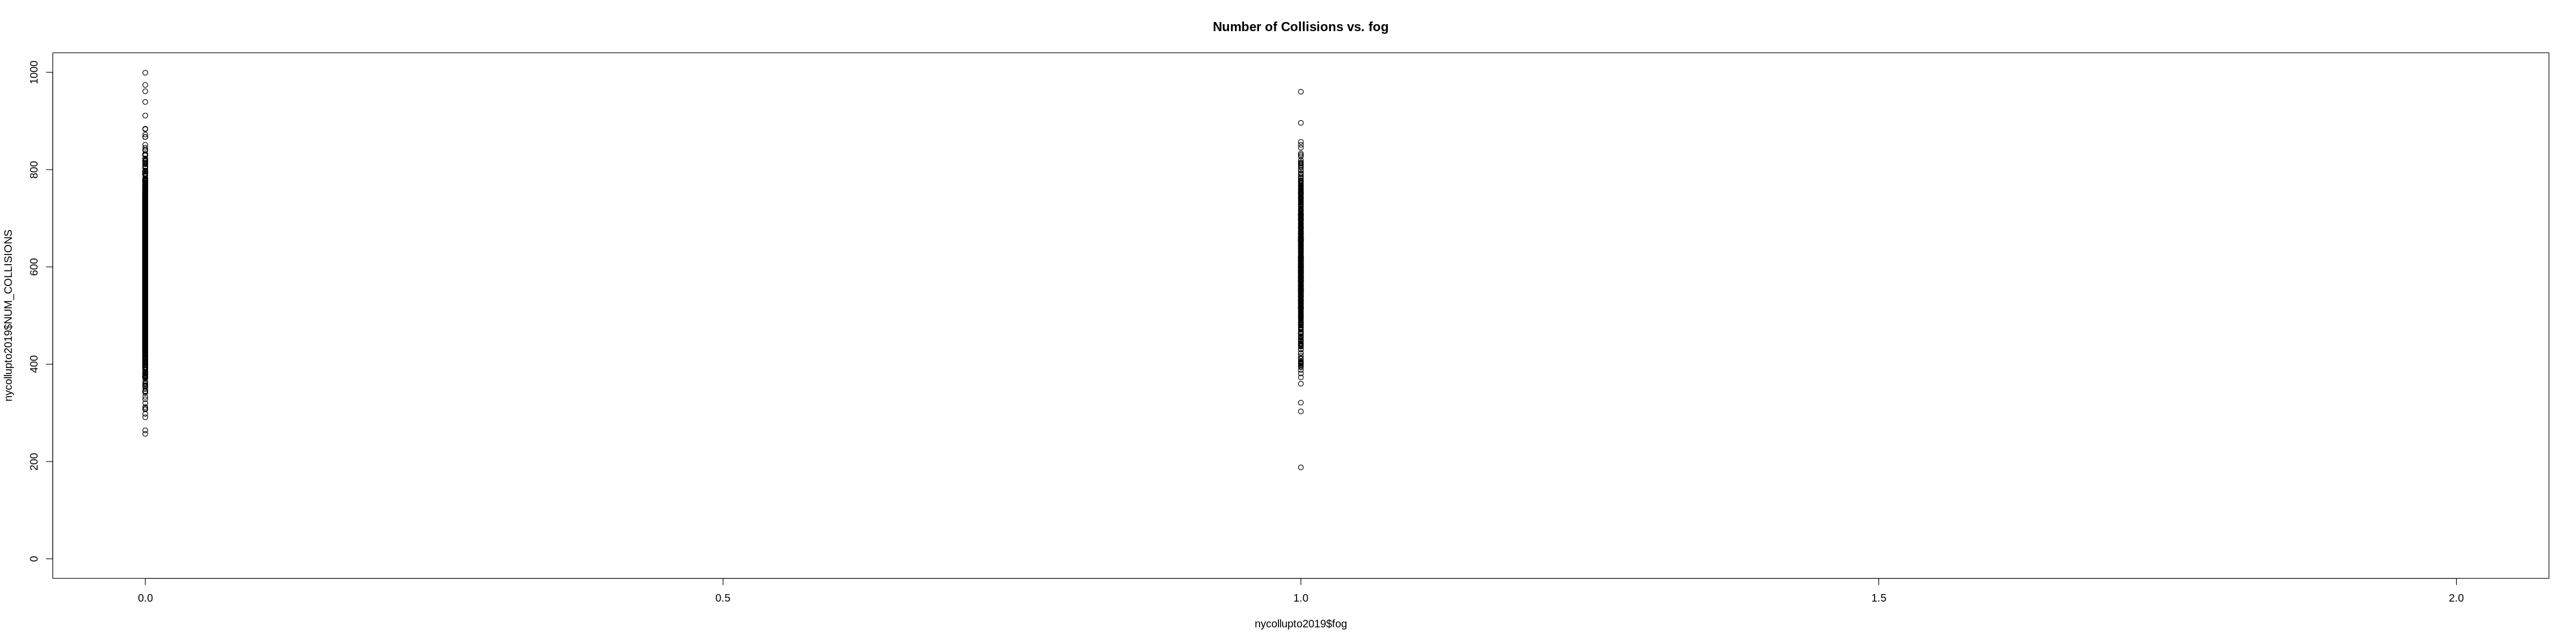

In [36]:
plot(nycollupto2019$fog, nycollupto2019$NUM_COLLISIONS, main="Number of Collisions vs. fog", xlim=c(0,2), ylim=c(0,1000))

From above figure we can see that number of collisions and it's density is very similar with and without fog, Hence this is ignored as well.

**Normalization of collisions**

Next activity is to normalize the collisions.

Normalization techniques enables us to reduce the scale of the variables and thus it affects the statistical distribution of the data in a positive manner (Mulani 2022).

Here we are going to use normalization method named "Min-Max Scaling" where we scale the data values between a range of 0 to 1 only. Due to this, the effect of outliers on the data values suppresses to a certain extent. Moreover, it helps us have a smaller value of the standard deviation of the data scale.

Below a reusable function for min-max normalization is defined.

In [37]:
#define Min-Max normalization function
min_max_norm <- function(x) {
    (x - min(x)) / (max(x) - min(x))
  }


Below we are applying normalization to individual years.

**Note:** The reason why we are applying normalization to individual years is because if we apply normalization to combined years data, its not giving distributed histogram which was poor as shown below.

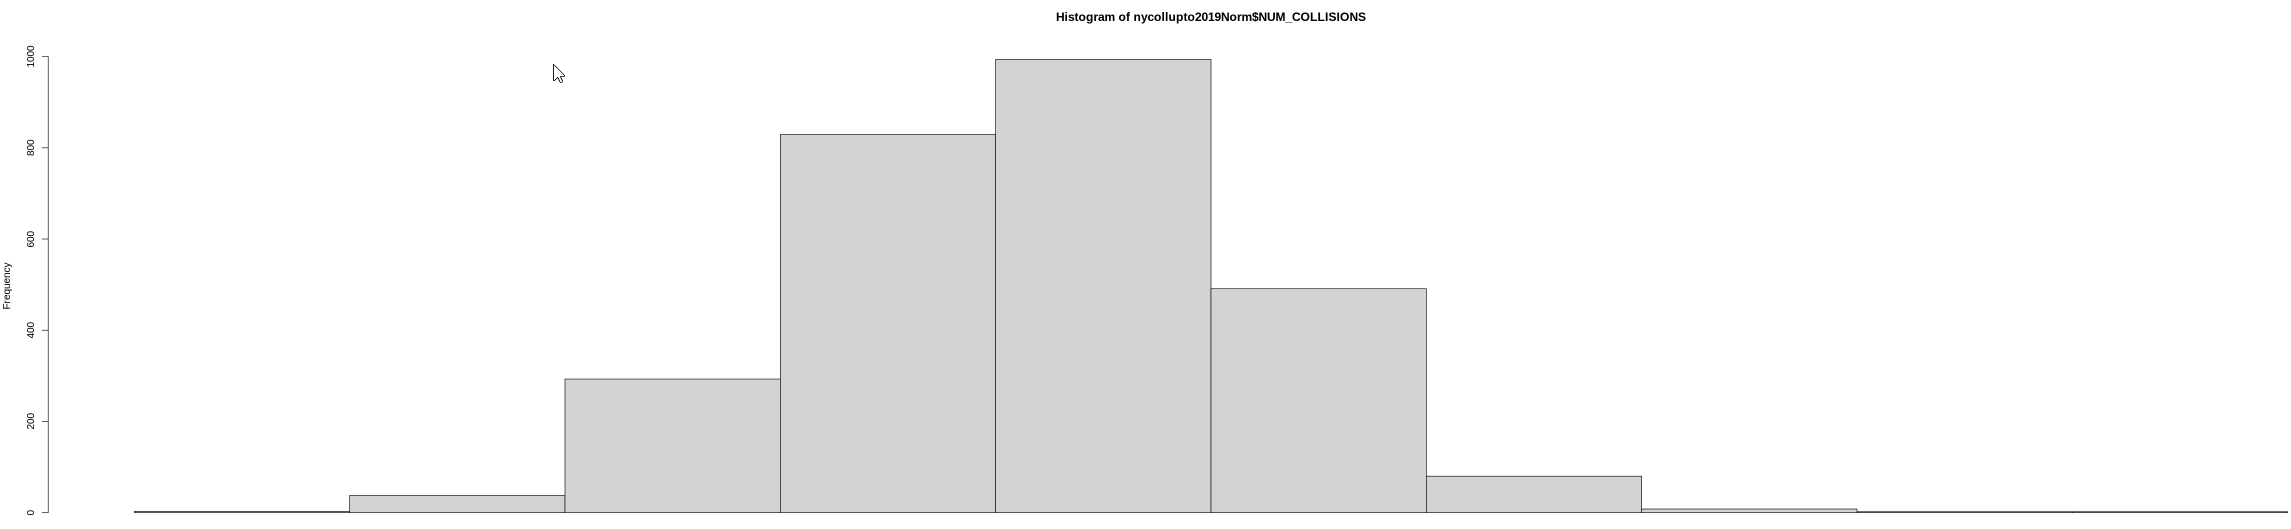

In [38]:
nycoll2012Norm <- nycoll2012TruncFinal
nycoll2012Norm[23] <- as.data.frame(lapply(nycoll2012Norm[23], min_max_norm))

nycoll2013Norm <- nycoll2013TruncFinal
nycoll2013Norm[23] <- as.data.frame(lapply(nycoll2013Norm[23], min_max_norm))

nycoll2014Norm <- nycoll2014TruncFinal
nycoll2014Norm[23] <- as.data.frame(lapply(nycoll2014Norm[23], min_max_norm))

nycoll2015Norm <- nycoll2015TruncFinal
nycoll2015Norm[23] <- as.data.frame(lapply(nycoll2015Norm[23], min_max_norm))

nycoll2016Norm <- nycoll2016TruncFinal
nycoll2016Norm[23] <- as.data.frame(lapply(nycoll2016Norm[23], min_max_norm))

nycoll2017Norm <- nycoll2017TruncFinal
nycoll2017Norm[23] <- as.data.frame(lapply(nycoll2017Norm[23], min_max_norm))

nycoll2018Norm <- nycoll2018TruncFinal
nycoll2018Norm[23] <- as.data.frame(lapply(nycoll2018Norm[23], min_max_norm))

nycoll2019Norm <- nycoll2019TruncFinal
nycoll2019Norm[23] <- as.data.frame(lapply(nycoll2019Norm[23], min_max_norm))


**Combine all years together after removing outliners**

Next activity is to combine normalized individual years data.

In [39]:
nycollupto2019NoOutlinersNorm <- rbind(nycoll2012Norm, nycoll2013Norm, nycoll2014Norm, nycoll2015Norm, nycoll2016Norm, nycoll2017Norm, nycoll2018Norm, nycoll2019Norm)

Below we can verify that data is normalized.

In [40]:
nycollupto2019NoOutlinersNorm[,23]

[1] 0.479768786 0.554913295 0.843930636 0.173410405 0.632947977 0.768786127
   [7] 0.341040462 0.265895954 0.465317919 0.439306358 0.557803468 0.592485549
  [13] 0.667630058 0.473988439 0.352601156 0.450867052 0.797687861 0.540462428
  [19] 0.433526012 0.670520231 0.450867052 0.364161850 0.384393064 0.583815029
  [25] 0.693641618 0.670520231 0.768786127 0.407514451 0.011560694 0.456647399
  [31] 0.485549133 0.705202312 0.572254335 0.627167630 0.566473988 0.421965318
  [37] 0.638728324 0.505780347 0.450867052 0.604046243 0.708092486 0.390173410
  [43] 0.384393064 0.381502890 0.427745665 0.664739884 0.696531792 0.583815029
  [49] 0.485549133 0.274566474 0.291907514 0.317919075 0.381502890 0.583815029
  [55] 0.661849711 0.294797688 0.286127168 0.508670520 0.621387283 0.514450867
  [61] 0.710982659 0.950867052 0.413294798 0.141618497 0.002890173 0.676300578
  [67] 0.661849711 0.578034682 0.890173410 0.653179191 0.265895954 0.765895954
  [73] 0.430635838 0.806358382 0.751445087 0.684971098 0.534682081 0.248554913
  [79] 0.231213873 0.531791908 0.693641618 0.433526012 0.815028902 0.505780347
  [85] 0.312138728 0.549132948 0.641618497 0.092485549 0.716763006 0.956647399
  [91] 0.326589595 0.222543353 0.528901734 0.638728324 0.375722543 0.526011561
  [97] 0.927745665 0.369942197 0.315028902 0.011560694 0.572254335 0.774566474
 [103] 0.823699422 0.641618497 0.505780347 0.419075145 0.679190751 0.664739884
 [109] 0.702312139 0.745664740 0.621387283 0.156069364 0.684971098 0.433526012
 [115] 0.352601156 0.401734104 0.653179191 0.439306358 0.089595376 0.000000000
 [121] 0.511560694 0.193641618 0.309248555 0.410404624 1.000000000 0.514450867
 [127] 0.913294798 0.208092486 0.445086705 0.505780347 0.797687861 0.731213873
 [133] 0.725433526 0.867052023 0.491329480 0.213872832 0.615606936 0.864161850
 [139] 0.916184971 0.034682081 0.315028902 0.248554913 0.124277457 0.552023121
 [145] 0.609826590 0.404624277 0.413294798 0.589595376 0.312138728 0.239884393
 [151] 0.719653179 0.719653179 0.410404624 0.716763006 0.988439306 0.601156069
 [157] 0.497109827 0.713872832 0.595375723 0.514450867 0.500000000 0.797687861
 [163] 0.436416185 0.369942197 0.800578035 0.789017341 0.630057803 0.676300578
 [169] 0.491329480 0.104046243 0.421965318 0.459537572 0.442196532 0.534682081
 [175] 0.202312139 0.112716763 0.317919075 0.023738872 0.317507418 0.522255193
 [181] 0.391691395 0.047477745 0.059347181 0.439169139 0.415430267 0.338278932
 [187] 0.540059347 0.851632047 0.302670623 0.000000000 0.501483680 0.424332344
 [193] 0.608308605 0.350148368 0.557863501 0.329376855 0.059347181 0.507418398
 [199] 0.510385757 0.537091988 0.893175074 0.548961424 0.166172107 0.397626113
 [205] 0.501483680 0.367952522 0.649851632 0.596439169 0.477744807 0.213649852
 [211] 0.534124629 0.572700297 0.572700297 0.454005935 0.979228487 0.089020772
 [217] 0.080118694 0.302670623 0.370919881 0.584569733 0.765578635 0.685459941
 [223] 0.225519288 0.219584570 0.074183976 0.308605341 0.406528190 0.370919881
 [229] 0.468842730 0.439169139 0.157270030 0.347181009 0.486646884 0.525222552
 [235] 0.427299703 0.682492582 0.299703264 0.382789318 0.664688427 0.456973294
 [241] 0.302670623 0.480712166 0.581602374 0.124629080 0.442136499 0.516320475
 [247] 0.780415430 0.545994065 0.694362018 0.439169139 0.157270030 0.741839763
 [253] 0.551928783 0.495548961 0.400593472 0.685459941 0.341246291 0.231454006
 [259] 0.370919881 0.154302671 0.201780415 0.522255193 0.436201780 0.415430267
 [265] 0.157270030 0.314540059 0.189910979 0.471810089 0.572700297 0.620178042
 [271] 0.468842730 0.231454006 0.620178042 0.712166172 0.614243323 0.427299703
 [277] 0.818991098 0.540059347 0.293768546 0.682492582 0.566765579 0.480712166
 [283] 0.534124629 0.584569733 0.471810089 0.290801187 0.569732938 0.415430267
 [289] 0.667655786 0.623145401 0.896142433 0.427299703 0.198813056 0.667655786
 [295] 0.602373887 0.602373887 0.629080119 0.928783383 0.614243323 0.421364985
 [301] 0.557863501 0.649851632 0.732937685 0.67952522

Below summary function confirms that collisions are between 0 to 1.

In [41]:
summary(nycollupto2019NoOutlinersNorm$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3928  0.5664  0.5483  0.7141  1.0000 

Below we can see from the histogram that collisions are properly distributed after normalization.

Also, this approach turned out to be much better as mentioned previously.

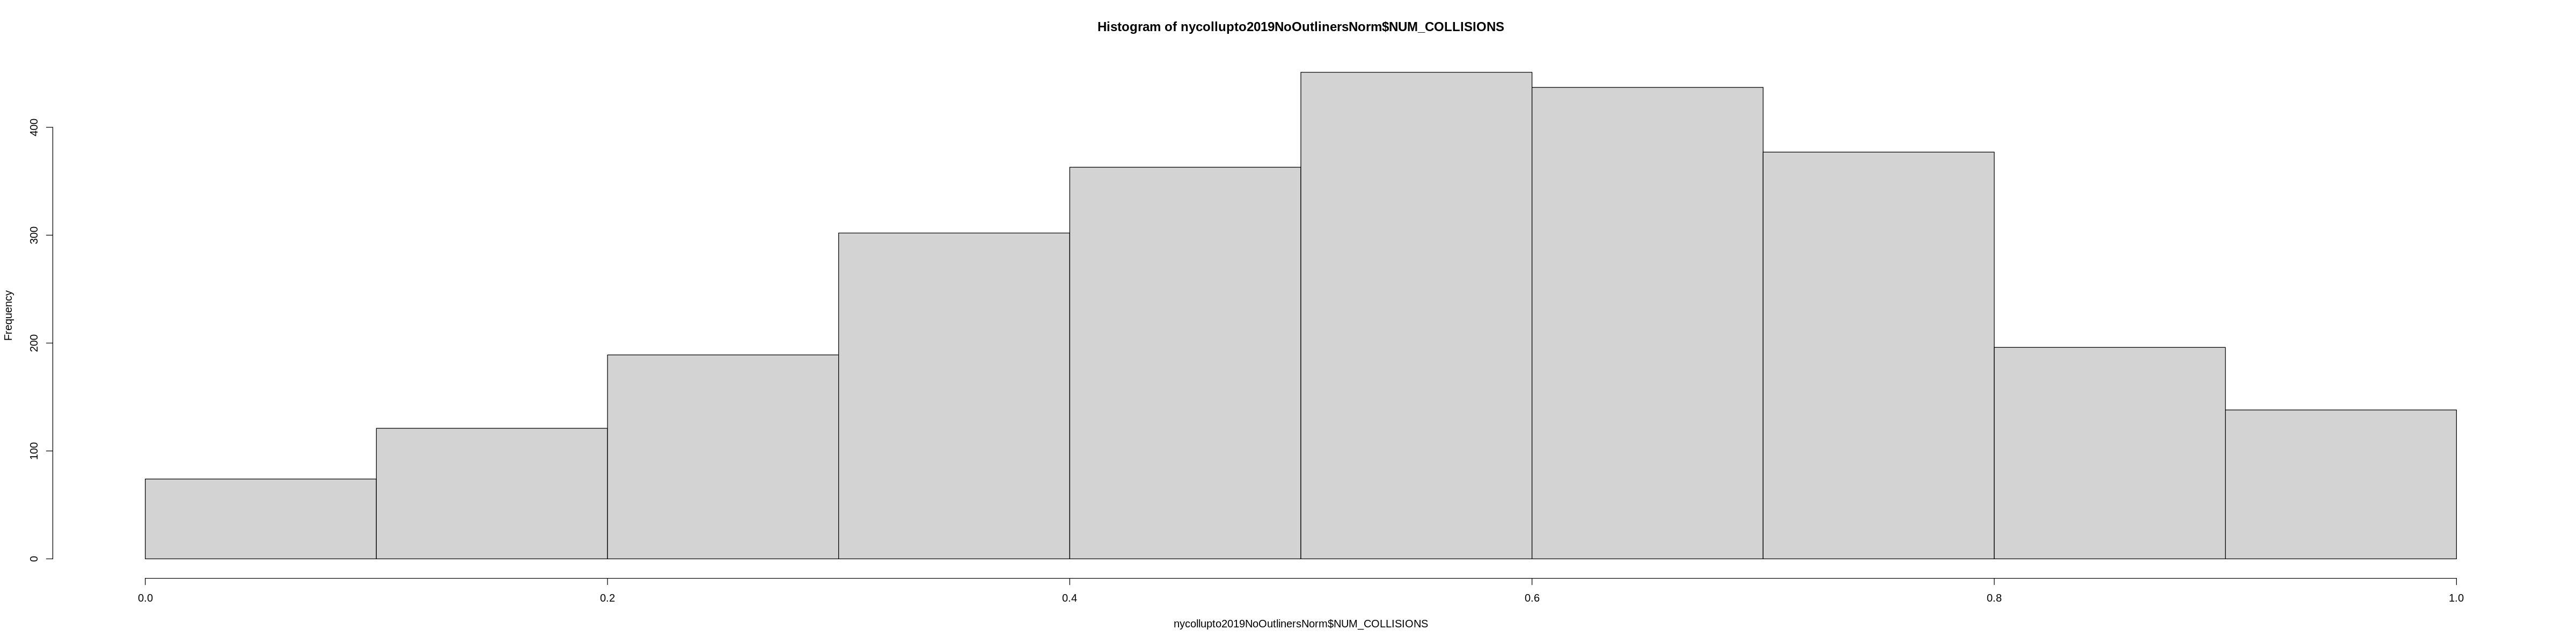

In [42]:
hist(nycollupto2019NoOutlinersNorm$NUM_COLLISIONS, breaks =8)

**Data Preparation for Linear Regression**

Based on all of above activities, we are going to consider below columns for the linear regression which will be used for the assignment 2.


*   Day of the week (day)
*   Temperature (temp)
*   Wind speed (wdsp)
*   Dew point (dewp)
*   Number of Collisions (NUM_COLLISIONS)


Below command creates new data frame with the required columns.

In [43]:
linearregressiondata <- nycollupto2019NoOutlinersNorm[,c(3,8,9,12,23)]

Below we can verify that required columns are selected successfully.

In [44]:
head(linearregressiondata)

,day,temp,dewp,wdsp,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,83.6,63.0,4.1,0.4797688
2,3,80.3,54.1,3.8,0.5549133
3,4,79.8,56.7,2.9,0.8439306
4,5,81.8,65.6,3.6,0.1734104
5,6,86.7,64.3,3.8,0.6329480
6,7,81.9,62.3,3.1,0.7687861


Now we are going to export the above data as CSV which will be uploaded to GitHub and will be utilized for assignment-2.

In [45]:
write.csv(linearregressiondata, file="/content/Assignment_1_lineardata.csv")

**Data Preparation for DNN models**

Next part is to prepare data for the DNN (Deep Learning Neural Network) regression. For this we will be considering Month and day of the week as it will play important role. We are considering Month due to seasonality effect seen earlier in the document. Day of the week also had different number of collisions.

Since Month and day of the year are distinct categorical data, it needs to be encoded for the DNN models.

Categorical data can be encoded either using **ordinal encoding** or **one hot encoding**.

One of the potential drawbacks ordinal encodings is that it implicitly assumes an order across the categories. For example, February (which is encoded with a value of 2) seems to be more than January (which is encoded with a value of 1), even though this is in fact not a meaningful way of comparing those values.

Due to this We will be performing one-hot encoding here.

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction (Vasudev 2017).

Before we perform one-hot encoding, we need to apply labels to month and day of the week as shown below.

In [46]:
nycollupto2019Encoded <- nycollupto2019NoOutlinersNorm

In [47]:
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 1] <- 'Jan'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 2] <- 'Feb'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 3] <- 'Mar'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 4] <- 'Apr'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 5] <- 'May'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 6] <- 'Jun'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 7] <- 'Jul'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 8] <- 'Aug'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 9] <- 'Sep'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 10] <- 'Oct'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 11] <- 'Nov'
nycollupto2019Encoded$mo[nycollupto2019Encoded$mo == 12] <- 'Dec'

Next, same activity is done over *day of the week*.

**Note:** Sunday is 1st day, Saturday 2nd day and Monday-Friday as 3 to 7 as per the previous changes.



In [48]:
nycollupto2019Encoded$day[nycollupto2019Encoded$day == 1] <- 'Sun'
nycollupto2019Encoded$day[nycollupto2019Encoded$day == 2] <- 'Sat'
nycollupto2019Encoded$day[nycollupto2019Encoded$day == 3] <- 'Mon'
nycollupto2019Encoded$day[nycollupto2019Encoded$day == 4] <- 'Tue'
nycollupto2019Encoded$day[nycollupto2019Encoded$day == 5] <- 'Wed'
nycollupto2019Encoded$day[nycollupto2019Encoded$day == 6] <- 'Thu'
nycollupto2019Encoded$day[nycollupto2019Encoded$day == 7] <- 'Fri'

This update is confirmed using below command.

In [49]:
head(nycollupto2019Encoded)

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,⋯,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,thunder,NUM_COLLISIONS
,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,182,Sun,2012,Jul,1,2012-07-01,83.6,63.0,1008.9,⋯,18.1,93.0,66.0,0.00,999.9,0,0,0,0,0.4797688
2,2,183,Mon,2012,Jul,2,2012-07-02,80.3,54.1,1011.6,⋯,999.9,88.0,66.9,0.00,999.9,0,0,0,0,0.5549133
3,3,184,Tue,2012,Jul,3,2012-07-03,79.8,56.7,1012.8,⋯,999.9,88.0,63.0,0.00,999.9,0,0,0,0,0.8439306
4,4,185,Wed,2012,Jul,4,2012-07-04,81.8,65.6,1009.1,⋯,999.9,91.0,68.0,0.06,999.9,0,1,0,0,0.1734104
5,5,186,Thu,2012,Jul,5,2012-07-05,86.7,64.3,1007.4,⋯,999.9,93.9,70.0,99.99,999.9,0,1,0,0,0.6329480
6,6,187,Fri,2012,Jul,6,2012-07-06,81.9,62.3,1011.7,⋯,999.9,91.0,66.9,0.00,999.9,0,0,0,0,0.7687861


Now one-hot encoding is applied to month as shown below.

In [50]:
months <- model.matrix(~0+nycollupto2019Encoded$mo)
head(months)

,nycollupto2019Encoded$moApr,nycollupto2019Encoded$moAug,nycollupto2019Encoded$moDec,nycollupto2019Encoded$moFeb,nycollupto2019Encoded$moJan,nycollupto2019Encoded$moJul,nycollupto2019Encoded$moJun,nycollupto2019Encoded$moMar,nycollupto2019Encoded$moMay,nycollupto2019Encoded$moNov,nycollupto2019Encoded$moOct,nycollupto2019Encoded$moSep
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0


Below command is run to update the column labels with readable values.

In [51]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

Column re-label is confirmed below.

In [52]:
head(months)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0


Now same activities are done for *day of the week*.

In [53]:
daysofweek <- model.matrix(~0+nycollupto2019Encoded$day)
head(daysofweek)

,nycollupto2019Encoded$dayFri,nycollupto2019Encoded$dayMon,nycollupto2019Encoded$daySat,nycollupto2019Encoded$daySun,nycollupto2019Encoded$dayThu,nycollupto2019Encoded$dayTue,nycollupto2019Encoded$dayWed
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0


Next, column labels are changed to readable format.

In [54]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [55]:
head(daysofweek)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0


Now new dataframe is created which contains above one-hot encoded columns for *year* and *day of week* and other important columns.

Also, column names are updated.

In [56]:
nycollupto2019DNNFinal <- data.frame(months, daysofweek, nycollupto2019Encoded$year, nycollupto2019Encoded$temp, nycollupto2019Encoded$dewp, nycollupto2019Encoded$wdsp, nycollupto2019Encoded$NUM_COLLISIONS)


# change names of other column names
colnames(nycollupto2019DNNFinal)[which(names(nycollupto2019DNNFinal) == "nycollupto2019Encoded.year")] <- "year"
colnames(nycollupto2019DNNFinal)[which(names(nycollupto2019DNNFinal) == "nycollupto2019Encoded.temp")] <- "temp"
colnames(nycollupto2019DNNFinal)[which(names(nycollupto2019DNNFinal) == "nycollupto2019Encoded.dewp")] <- "dewp"
colnames(nycollupto2019DNNFinal)[which(names(nycollupto2019DNNFinal) == "nycollupto2019Encoded.wdsp")] <- "wdsp"
colnames(nycollupto2019DNNFinal)[which(names(nycollupto2019DNNFinal) == "nycollupto2019Encoded.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

Now summary is run to see if data is updated as expected.

In [57]:
summary(nycollupto2019DNNFinal)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.07893   Mean   :0.09366   Mean   :0.08724   Mean   :0.07251  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.07893   Mean   :0.09328   Mean   :0.07326   Mean   :0.07968  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000

In [58]:
head(nycollupto2019DNNFinal)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Sat,Sun,Thu,Tue,Wed,year,temp,dewp,wdsp,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,1,0,0,0,0,⋯,0,1,0,0,0,2012,83.6,63.0,4.1,0.4797688
2,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,2012,80.3,54.1,3.8,0.5549133
3,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,0,2012,79.8,56.7,2.9,0.8439306
4,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,1,2012,81.8,65.6,3.6,0.1734104
5,0,0,0,0,0,1,0,0,0,0,⋯,0,0,1,0,0,2012,86.7,64.3,3.8,0.6329480
6,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,2012,81.9,62.3,3.1,0.7687861


Last activity performed is to export this data for DNN model which is used as part of assignment-2.

In [59]:
write.csv(nycollupto2019DNNFinal, file="/content/nycollupto2019DNNFinal.csv")

It might be that multiple models are created using various combinations of columns for the assingment-2 but it will be done manually by tweaking the CSS directly.

# Conclusions

This section will summorise all the activties that are permoted as part of this document.

Below are the activities done so far.

In Google BigQuery:
*   Fetch weather data.
*   Collate 2012 to 2021 New York Central Park data.
*   Collate 2012 to 2021 New York Collisions data.
*   Collate Collisions and Weather data into single table.
*   Export Collated data as CSV
*   Upload data to GitHub

In Google Colab
*   Create notebook with R kernel
*   Fetch CSV file which contains collisions and weather data from GitHub.
*   Analyse and Remove Covid-19 affected data.
*   Day of the Week vs. Collisions Analysis , change of days of week ordering.
*   Seasonality vs. Collisions Analysis, removal of outliners.
*   Weather vs. Collisions Analysis
*   Normalization of collisions count.
*   Collation of normalized data.
*   Export of CSV which contains selective columns for Linear regression.
*   One-hot encoding on month and day of week columns.
*   Export of CSV which contains one-hot encoded columns along with selective columns for DNN regression.




# References

LAKSHMANAN, V. and TIGANI, J., 2019. Google BigQuery: The Definitive Guide. O'Reilly Media, Inc.



MILLER, S., Nov 01, 2022-last update, What Is R Used For?. Available: https://www.codecademy.com/resources/blog/what-is-r-used-for/ [Nov 07, 2022].



MULANI, S., August 3, 2022-last update, How to Normalize data in R [3 easy methods]. Available: https://www.digitalocean.com/community/tutorials/normalize-data-in-r [November 05, 2022].


VASUDEV, 2017. What is One Hot Encoding? Why and When Do You Have to Use it? .
